# Terremotos y sus consecuencias
<p align="right"><b><i>Por: José Francisco Núñez Obando</i></b></p>

## ¿Que son los Terremotos?

Los terremotos son el resultado de fuerzas profundas en el interior de la Tierra que afectan continuamente la superficie de esta. La energía de estas fuerzas se almacena de diversas maneras dentro de las rocas. Cuando esta energía es liberada repentinamente, por ejemplo, por movimientos de esquila a lo largo de fallas en la corteza de la Tierra, se produce un terremoto. El área de la falla donde se produce la ruptura repentina se llama el foco o hipocentro del terremoto. El punto en la superficie de la Tierra directamente por encima del foco se llama el epicentro del terremoto.<p>Los riesgos que representan los terremotos para la sociedad, incluidas las muertes, las lesiones y las pérdidas económicas, pueden reducirse en gran medida mediante: (1) mejores prácticas de planificación, construcción y mitigación antes de que ocurran los terremotos, y (2) al proporcionar información crítica y oportuna para mejorar la respuesta después de que estos se producen.
<p align="right"><b><i>(Fuente: US Geological Survey (1997) The severity of an earthquake. U.S. Government Printing Office)</i></b></p>
<p>Un terremoto significativo se clasifica como uno que cumple al menos uno de los siguientes criterios: muertes causadas, daños moderados (aproximadamente $ 1 millón o más), magnitud 7.5 o mayor, Intensidad de Mercalli Modificada (MMI) X o mayor, o el terremoto generado un tsunami.<b><i>(https://data.nodc.noaa.gov/)</i></b>

# El registro de terremotos a nivel mundial

Los Centros Nacionales de Información Ambiental (NCEI) de la NOAA son responsables de preservar, monitorear, evaluar y brindar acceso público al tesoro de la información geofísica.

POr tanto, la información que será aquí analizada ha sido recabada por la <b>National Centers for Environmental Information of National Oceanic and Atmospheric Administration (NOAA)</b>.
<img src="https://data.nodc.noaa.gov/css/apps/iso/images/logos/logo_noaa.png" alt="NOAA">
<p>Dentro de esta figura como fuente de datos los siguientes servicios dentro de la NOAA: National Geophysical Data Center / World Data Service (NGDC/WDS): NCEI/WDS Global Significant Earthquake Database. NOAA National Centers for Environmental Information; los cuales aportan información a la base de datos sobre terremotos.

La base de datos de terremotos significativos es una lista global de más de 5,700 terremotos desde 2150 aC hasta el presente. Un terremoto significativo se clasifica como uno que cumple al menos uno de los siguientes criterios: <q style="background-color:LightBlue;">muertes causadas, daños moderados (aproximadamente $ 1 millón o más), intensidad 7.5 o mayor, Intensidad de Mercalli Modificada (MMI) X o mayor, o el terremoto generando un tsunami La base de datos proporciona información sobre la fecha y la hora en que se produjo, latitud y longitud, la profundidad focal, la intensidad, la intensidad máxima de MMI y los datos socioeconómicos, como el número total de víctimas, lesiones, casas destruidas y dañadas, así como, estimaciones de daños en dolares</q>. También se proporcionan referencias, geografía política y comentarios adicionales para cada terremoto. Si el terremoto se asoció con un tsunami o erupción volcánica, se marca y se vincula con el evento de tsunami relacionado o una erupción volcánica significativa.
<img src="https://www.ngdc.noaa.gov/hazard/icons/sigeqsm.jpg" alt="Significant Earthquake Database">

El link de descarga de la base de datos es el siguiente: <a href="https://www.ngdc.noaa.gov/nndc/struts/form?t=101650&s=1&d=1">https://www.ngdc.noaa.gov/nndc/struts/form?t=101650&s=1&d=1</a>, la cual tiene como nombre <b style="color:blue;">Significant Earthquake Database</b>.
<p>Esta información se descarga en formato txt, sin embargo, se utilizó un software de Sistema de Información Geográfica (QGIS) para transformar esta a formato geojson, con el fin de poder hacer uso de la libreria <b style="color:red;">GeoPandas</b>. 
<p>Adicional a la libreria de python anteriormente mencionada, se agregan otras tales como: <b style="color:red;">Pandas,Numpy, Matplotlib, entre otras más.</b>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import mapclassify as mc
import seaborn as sbn
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import HTML
from IPython.display import YouTubeVideo

pd.options.display.float_format = '{:,.2f}'.format

Para comenzar con el análisis de datos sobre terremotos, iniciaremos cargando el dataframe transformado al formato geojson

In [2]:
eq = gpd.GeoDataFrame.from_file("Dataset/earthquakes.geojson").dropna(how='all')

A continuación, se muestra las columnas que componen esta base de datos:

In [3]:
eq.columns

Index(['I_D', 'FLAG_TSUNAMI', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE',
       'SECOND', 'FOCAL_DEPTH', 'EQ_PRIMARY', 'EQ_MAG_MW', 'EQ_MAG_MS',
       'EQ_MAG_MB', 'EQ_MAG_ML', 'EQ_MAG_MFA', 'EQ_MAG_UNK', 'INTENSITY',
       'COUNTRY', 'STATE', 'LOCATION_NAME', 'LATITUDE', 'LONGITUDE',
       'REGION_CODE', 'DEATHS', 'DEATHS_DESCRIPTION', 'MISSING',
       'MISSING_DESCRIPTION', 'INJURIES', 'INJURIES_DESCRIPTION',
       'DAMAGE_MILLIONS_DOLLARS', 'DAMAGE_DESCRIPTION', 'HOUSES_DESTROYED',
       'HOUSES_DESTROYED_DESCRIPTION', 'HOUSES_DAMAGED',
       'HOUSES_DAMAGED_DESCRIPTION', 'TOTAL_DEATHS',
       'TOTAL_DEATHS_DESCRIPTION', 'TOTAL_MISSING',
       'TOTAL_MISSING_DESCRIPTION', 'TOTAL_INJURIES',
       'TOTAL_INJURIES_DESCRIPTION', 'TOTAL_DAMAGE_MILLIONS_DOLLARS',
       'TOTAL_DAMAGE_DESCRIPTION', 'TOTAL_HOUSES_DESTROYED',
       'TOTAL_HOUSES_DESTROYED_DESCRIPTION', 'TOTAL_HOUSES_DAMAGED',
       'TOTAL_HOUSES_DAMAGED_DESCRIPTION', 'geometry'],
      dtype='object')

De esta lista de columnas se eliminaran algunas de las cuales no se consideraran para su análisis, los cuales se eliminan de la siguiente forma

In [4]:
eq.drop(['DEATHS_DESCRIPTION', 'MISSING_DESCRIPTION', 'INJURIES_DESCRIPTION', 'DAMAGE_DESCRIPTION', 'HOUSES_DESTROYED_DESCRIPTION', 'HOUSES_DAMAGED_DESCRIPTION',
         'TOTAL_DEATHS_DESCRIPTION', 'TOTAL_MISSING_DESCRIPTION', 'TOTAL_INJURIES_DESCRIPTION', 'TOTAL_DAMAGE_DESCRIPTION', 'TOTAL_HOUSES_DESTROYED_DESCRIPTION', 
         'TOTAL_HOUSES_DAMAGED_DESCRIPTION'], axis=1, inplace=True)

Por consiguiente, el dataframe estará finalmente conformado por las siguientes columnas

In [5]:
eq.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 6081 entries, 0 to 6080
Data columns (total 36 columns):
I_D                              6081 non-null int64
FLAG_TSUNAMI                     1800 non-null object
YEAR                             6081 non-null int64
MONTH                            5677 non-null float64
DAY                              5525 non-null float64
HOUR                             4054 non-null float64
MINUTE                           3848 non-null float64
SECOND                           4252 non-null object
FOCAL_DEPTH                      3131 non-null float64
EQ_PRIMARY                       4296 non-null float64
EQ_MAG_MW                        1226 non-null float64
EQ_MAG_MS                        2911 non-null float64
EQ_MAG_MB                        1788 non-null float64
EQ_MAG_ML                        180 non-null float64
EQ_MAG_MFA                       14 non-null float64
EQ_MAG_UNK                       772 non-null float64
INTENSITY      

Obteniendo así un data frame de 36 columnas y 6081 filas

In [6]:
eq.shape

(6081, 36)

Quedando conformado el dataframe de la siguiente forma

In [7]:
eq.head()

,I_D,FLAG_TSUNAMI,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,FOCAL_DEPTH,EQ_PRIMARY,...,DAMAGE_MILLIONS_DOLLARS,HOUSES_DESTROYED,HOUSES_DAMAGED,TOTAL_DEATHS,TOTAL_MISSING,TOTAL_INJURIES,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DAMAGED,geometry
0,1,None,-2150,nan,nan,nan,nan,,nan,7.30,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,POINT (35.5 31.1)
1,3,None,-2000,nan,nan,nan,nan,None,18.00,7.10,...,nan,nan,nan,1.00,nan,nan,nan,nan,nan,POINT (58.2 38)
2,2,Tsu,-2000,nan,nan,nan,nan,None,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,POINT (35.8 35.683)
3,5877,Tsu,-1610,nan,nan,nan,nan,None,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,POINT (25.4 36.4)
4,8,None,-1566,nan,nan,nan,nan,,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,POINT (35.3 31.5)


Al observar el dataframe resultante, es posible identificar una gran cantidad de valores nulos, en las diferentes columnas y valores, dado el hecho que esta base de datos retoma el registro de terremotos con mucha antiguedad y de los cuales no se cuenta con toda la información que estructura el dataframe, por tanto, se toma la decisión de acortar el rango de datos a analizar a partir del un periodo de tiempo más cercano al actual.

# Análisis de datos sobre terremotos en los últimos 100 años

Para el análisis de datos sobre terremotos, nos enfocaremos en este estudio en los registros de los últimos 100 años, ya que para este periodo se cuenta con información más abundante y precisa, dado el hecho que durante este tiempo el registro geofísico fue mejorando desde el punto de vista técnico, por ejemplo, la magnitud, la cual mide la energía liberada en la fuente del terremoto, se determina a partir de mediciones con sismógrafos, y estos no estaban disponibles en la era pre-instrumental, por tanto, antes de esta de esta epoca las magnitudes se derivaban de las intensidades, por lo que no se lograba una distinción alguna de estas. 
<p>De modo tal, el periodo seleccionado para análisis abarca desde el 1918 hasta el 2018, sin tomar en consideración el año en curso (2019) del cual se esta a un cuarto de periodo. 
<p>A continuación, el filtrado de los datos expresado en la siguiente linea de código.

In [8]:
eq100 = eq.loc[(eq.YEAR >= 1918) & (eq.YEAR <= 2018)]
pd.DataFrame(eq100)

,I_D,FLAG_TSUNAMI,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,FOCAL_DEPTH,EQ_PRIMARY,...,DAMAGE_MILLIONS_DOLLARS,HOUSES_DESTROYED,HOUSES_DAMAGED,TOTAL_DEATHS,TOTAL_MISSING,TOTAL_INJURIES,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DAMAGED,geometry
2850,3105,None,1918,1.00,4.00,4.00,37.00,None,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,POINT (-90 14)
2851,3106,None,1918,1.00,30.00,21.00,18.00,33.0,350.00,7.70,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,POINT (136.5 45.4)
2852,3109,None,1918,2.00,7.00,5.00,20.00,30.0,120.00,7.50,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,POINT (126.5 6.5)
2853,3110,Tsu,1918,2.00,13.00,6.00,7.00,13.0,23.00,7.30,...,nan,nan,nan,"2,000.00",nan,nan,nan,nan,nan,POINT (117.2 23.5)
2854,3111,None,1918,4.00,21.00,22.00,32.00,,nan,6.80,...,0.20,nan,nan,nan,nan,nan,nan,nan,nan,POINT (-117 33.7)
2855,3112,Tsu,1918,5.00,20.00,17.00,55.00,10.0,80.00,7.90,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,POINT (-71.5 -28.5)
2856,3114,None,1918,7.00,3.00,6.00,52.00,,60.00,7.50,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,POINT (142.5 -3.5)
2857,3115,None,1918,7.00,8.00,10.00,22.00,7.0,60.00,7.60,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,POINT (91 24.5)
2858,8101,Tsu,1918,8.00,14.00,nan,nan,None,nan,5.50,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,POINT (103 26.9)
2859,3116,Tsu,1918,8.00,15.00,12.00,18.00,12.0,33.00,8.30,...,nan,nan,nan,52.00,nan,nan,nan,nan,nan,POINT (123 5.5)


Debido a que este dataframe cuenta con información por columna de: años, meses, dias, horas y minutos; se decide agrupar estos valores en una única columna previendo que en algun punto del análisis se requiera el uso de series temporales, a través del data "timestamp". En el siguiente procedimiento se crea dicha columna y se asigna esta como índice de la base de datos. 

In [9]:
eq100['TIMESTAMP']= pd.to_datetime(eq100[['YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE']], format="%Y/%m/%d")
eq100.TIMESTAMP.head()

2850   1918-01-04 04:37:00
2851   1918-01-30 21:18:00
2852   1918-02-07 05:20:00
2853   1918-02-13 06:07:00
2854   1918-04-21 22:32:00
Name: TIMESTAMP, dtype: datetime64[ns]

En el siguiente paso, asignaremos la columna de tiempo creada como índice del dataframe

In [10]:
eq100 = eq100.set_index('TIMESTAMP')
eq100.head()

,I_D,FLAG_TSUNAMI,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,FOCAL_DEPTH,EQ_PRIMARY,...,DAMAGE_MILLIONS_DOLLARS,HOUSES_DESTROYED,HOUSES_DAMAGED,TOTAL_DEATHS,TOTAL_MISSING,TOTAL_INJURIES,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DAMAGED,geometry
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
1918-01-04 04:37:00,3105,None,1918,1.00,4.00,4.00,37.00,None,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,POINT (-90 14)
1918-01-30 21:18:00,3106,None,1918,1.00,30.00,21.00,18.00,33.0,350.00,7.70,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,POINT (136.5 45.4)
1918-02-07 05:20:00,3109,None,1918,2.00,7.00,5.00,20.00,30.0,120.00,7.50,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,POINT (126.5 6.5)
1918-02-13 06:07:00,3110,Tsu,1918,2.00,13.00,6.00,7.00,13.0,23.00,7.30,...,nan,nan,nan,"2,000.00",nan,nan,nan,nan,nan,POINT (117.2 23.5)
1918-04-21 22:32:00,3111,None,1918,4.00,21.00,22.00,32.00,,nan,6.80,...,0.20,nan,nan,nan,nan,nan,nan,nan,nan,POINT (-117 33.7)


<h1 id="Objetivos" >Objetivos del estudio</h1>
<p>De esta base de datos filtrada y relacionada con datos sobre terremotos ocurridos en últimos 100 años, interesa análizar información tal como: 
<div class="alert alert-info">
<ul><b><li>Temporalidad</b>; análisis por Años, Meses y Horas</ul><ul><b><li>Localización</b>; análisis por la ubicación en que ocurrio el terremoto, localidad, país y región </ul><ul><b><li>Características de los terremotos</b>; se analizan magnitud, intensidad y peligro asociado (Tsunami)</ul><ul><b><li>Efectos de los terremotos</b>; se analizan el número de muertos y lesiones por terremotos, además de daños materiales en millones de dólares y número de casas destruidas o dañadas.</ul><ul><b><li>Además, se agrega a estos análisis, uno que corresponde a la frecuencia interanual con la que ocurren de los terremotos por país.</ul>
    </div>

<h1>Temporalidad</h1>
<p>En este apartado se analizan los datos de terremotos por información temporal: Año, Mes y Hora

<h2>En años</h2>

Al analizar la cantidad de terremotos registrados anualmente durante los últimos 100 años, se observa que a partir del cambio de siglo, la cantidad de estos ha aumentado con relación a los anteriores años, tal y como se puede apreciar en el siguiente gráfico.

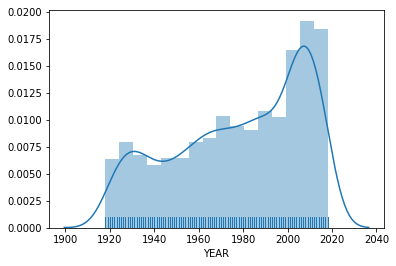

In [11]:
sbn.distplot(eq100['YEAR'], rug=True)

Se observa un acumulación de eventos en la primera década del 2000, siendo el 2004 el año con mayor cantidad de terremotos seguido del 2008, un aspecto evidente en los picos de la curva gráfica que se muestra a continuación.

2004    78
2008    77
2003    72
2007    67
2018    64
2010    62
2006    61
2009    60
2005    60
2002    60
Name: YEAR, dtype: int64


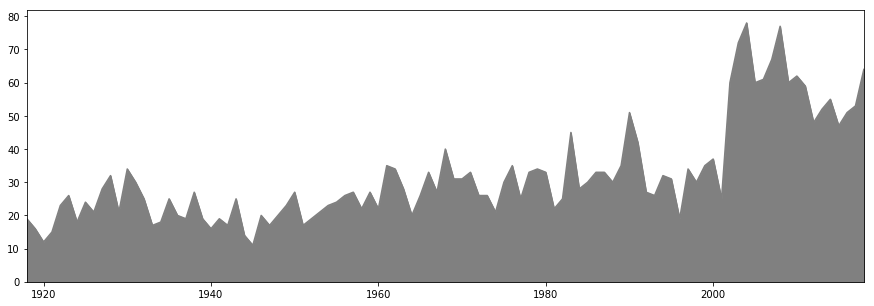

In [12]:
eq100_y = eq100.YEAR.value_counts().sort_index()
eq100_y.plot(kind='area', figsize=(15, 5), color='grey')
print(eq100_y.sort_values(ascending=False).head(10))

Si comparamos en una gráfica el detalle los 5 años con mayor cantidad de terretos registrados se tiene que estos corresponden a los años: 2004, 2008, 2003, 2007 y 2018

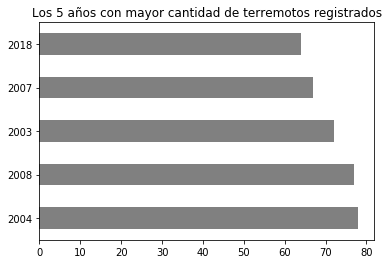

In [13]:
eq100['YEAR'].value_counts(sort=True).head().plot.barh(title='Los 5 años con mayor cantidad de terremotos registrados', color='grey')

Por su parte, si se análizan los 5 años que corresponde con la menor cantidad de terremotos registrados, se tiene que estos coinsiden algunos con la década de los años 20 do cercanos a esta (1919, 1921 y 1920), así como otros con la década de los 40 (1944 y 1945)

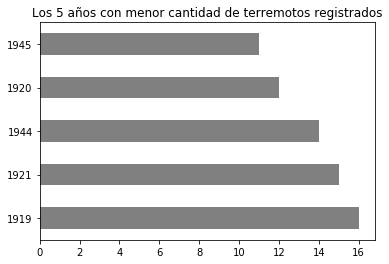

In [14]:
eq100['YEAR'].value_counts(sort=True).tail().plot.barh(title='Los 5 años con menor cantidad de terremotos registrados', color='grey')

<h2>En meses</h2>
<p>Respecto a la ocurrencia de terremotos en relación con los meses del año, tal y como se muestra en el siguiente gráfico, se observa que la mayoría de los terremotos analizados han ocurrido en el mes de noviembre, sido del mes de agosto, y en el mes en que menos terremotos han ocurrido corresponde a junio.

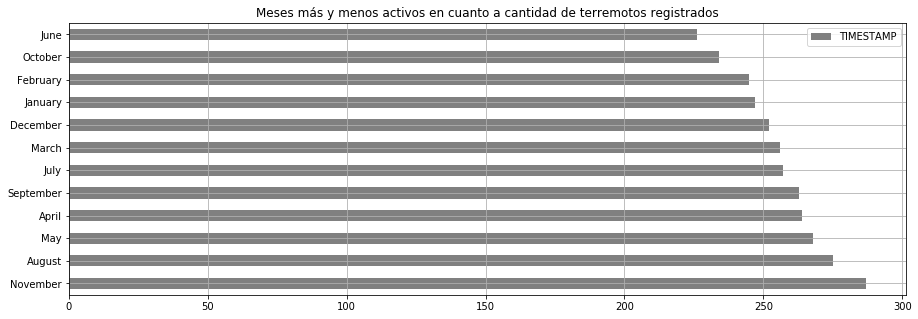

In [15]:
eq100.index.month_name().value_counts().plot.barh(title='Meses más y menos activos en cuanto a cantidad de terremotos registrados', grid=True, figsize=(15,5), color='grey')
plt.legend()

<h2>En horas</h2>
<p>Si se analizan los terremotos en términos de los periodos horarios, se observa que el horario de la noche (de 6 pm a 12 mn) y seguido del horario de la mañana (de 5 am a 12 md), son los que corresponden con una mayor frecuencia en la ocurrencia de terremotos. Por otra parte, el horario de la tarde (12 md a 6 pm) y el de la madrugada (12 mn a 5 am) corresponde con los que menor frecuencia de terremotos se han registrado. Lo anterior se puede observar en la siguiente gráfica.

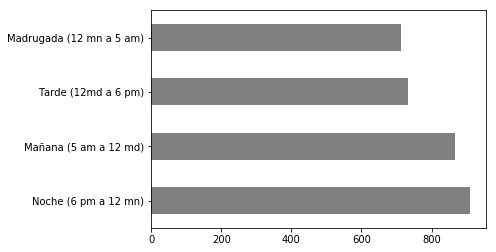

In [16]:
bins = [0, 5.0, 12.0, 18.0]
names = ['Madrugada (12 mn a 5 am)','Mañana (5 am a 12 md)', 'Tarde (12md a 6 pm)', 'Noche (6 pm a 12 mn)']

d = dict(enumerate(names, 1))

hours = np.vectorize(d.get)(np.digitize(eq100.HOUR, bins))
pd.Series(hours).value_counts().plot.barh(color='grey')

<h1>Localización</h1>
<p>En este subapartado se analiza: la ubicación del terremoto, en relación con el epicentro, así como la cantidad por país y región

<h2>El panorama de los terremotos a nivel mundial</h2>
<p>Dada la necesidad de realizar posibles análisis a nivel continental, país, región, etc; se obtó por incluir una base de datos, en formato de objeto espacial (geometría poligonal), relacionado con datos de los diferentes paises y continentes del planeta. Este se obtuvo a través del sitio <a href="https://www.naturalearthdata.com/">https://www.naturalearthdata.com/</a>, sección <b>1:110m Cultural Vectors</b>, archivo <b>Admin 0 – Countries</b>.
<p>La base de datos de dicho archivo posee las siguientes columnas:

In [17]:
wd = gpd.read_file("Dataset/world.geojson")
wd.columns

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT',
       'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG',
       'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN',
       'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT',
       'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13',
       'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS',
       'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'WIKIPEDIA', 'FIPS_10_', 'ISO_A2',
       'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID',
       'WOE_ID_EH', 'WOE_NOTE', 'ADM0_A3_IS', 'ADM0_A3_US', 'ADM0_A3_UN',
       'ADM0_A3_WB', 'CONTINENT', 'REGION_UN', 'SUBREGION', 'REGION_WB',
       'NAME_LEN', 'LONG_LEN', 'ABBREV_LEN', 'TINY', 'HOMEPART', 'MIN_ZOOM',
       'MIN_LABEL', 'MAX_LABEL', 'NE_ID', 'WIKIDATAID', 'NAME_AR', 'NAME_BN',
       'NAME_DE', 'NAME_

De esta base de datos se eliminan las siguientes, las cuales no serán de utlidad para los análisis posteriores.

In [18]:
wd.drop(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL','ADM0_A3', 'GEOU_DIF', 'GEOUNIT',
       'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG',
       'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN',
       'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT',
       'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13',
       'WIKIPEDIA', 'FIPS_10_', 'ISO_A2',
       'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID',
       'WOE_ID_EH', 'WOE_NOTE', 'ADM0_A3_IS', 'ADM0_A3_US', 'ADM0_A3_UN',
       'ADM0_A3_WB', 'REGION_WB', 'NAME_LEN', 'LONG_LEN', 'ABBREV_LEN', 'TINY', 'HOMEPART', 'MIN_ZOOM',
       'MIN_LABEL', 'MAX_LABEL', 'NE_ID', 'WIKIDATAID', 'NAME_AR', 'NAME_BN',
       'NAME_DE', 'NAME_EN', 'NAME_ES', 'NAME_FR', 'NAME_EL', 'NAME_HI',
       'NAME_HU', 'NAME_ID', 'NAME_IT', 'NAME_JA', 'NAME_KO', 'NAME_NL',
       'NAME_PL', 'NAME_PT', 'NAME_RU', 'NAME_SV', 'NAME_TR', 'NAME_VI',
       'NAME_ZH',], axis=1, inplace=True)

A continuación, se da un tratamiento a la columna de datos correspondiente a país para que esta sea más fácil de identificar y comparar con la base de datos de terremotos, la cual posee el mismo nombre de columna

In [19]:
wd['COUNTRY'] = wd['ADMIN'].str.upper()
wd = wd.set_index('COUNTRY')
sorted(wd.index.unique())

['AFGHANISTAN',
 'ALBANIA',
 'ALGERIA',
 'ANGOLA',
 'ANTARCTICA',
 'ARGENTINA',
 'ARMENIA',
 'AUSTRALIA',
 'AUSTRIA',
 'AZERBAIJAN',
 'BANGLADESH',
 'BELARUS',
 'BELGIUM',
 'BELIZE',
 'BENIN',
 'BHUTAN',
 'BOLIVIA',
 'BOSNIA-HERZEGOVINA',
 'BOTSWANA',
 'BRAZIL',
 'BRUNEI',
 'BULGARIA',
 'BURKINA FASO',
 'BURUNDI',
 'CAMBODIA',
 'CAMEROON',
 'CANADA',
 'CENTRAL AFRICAN REPUBLIC',
 'CHAD',
 'CHILE',
 'CHINA',
 'COLOMBIA',
 'CONGO',
 'COSTA RICA',
 'CROATIA',
 'CUBA',
 'CYPRUS',
 'CZECH REPUBLIC',
 'DENMARK',
 'DJIBOUTI',
 'DOMINICAN REPUBLIC',
 'EAST TIMOR',
 'ECUADOR',
 'EGYPT',
 'EL SALVADOR',
 'EQUATORIAL GUINEA',
 'ERITREA',
 'ESTONIA',
 'ESWATINI',
 'ETHIOPIA',
 'FALKLAND ISLANDS',
 'FIJI',
 'FINLAND',
 'FRANCE',
 'FRENCH SOUTHERN AND ANTARCTIC LANDS',
 'GABON',
 'GAMBIA',
 'GEORGIA',
 'GERMANY',
 'GHANA',
 'GREECE',
 'GREENLAND',
 'GUATEMALA',
 'GUINEA',
 'GUINEA-BISSAU',
 'GUYANA',
 'HAITI',
 'HONDURAS',
 'HUNGARY',
 'ICELAND',
 'INDIA',
 'INDONESIA',
 'IRAN',
 'IRAQ',
 'IRELAND',

En el siguiente punto, se imprime el dataframe de paises y continente, nombrado aquí con la variable "wd"

In [20]:
wd.head()

,TYPE,ADMIN,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,REGION_UN,SUBREGION,geometry
COUNTRY,,,,,,,,,,,,,,
FIJI,Sovereign country,Fiji,920938,11,"8,374.00",2017,2007,2016,6. Developing region,4. Lower middle income,Oceania,Oceania,Melanesia,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
TANZANIA,Sovereign country,Tanzania,53950935,16,"150,600.00",2017,2002,2016,7. Least developed region,5. Low income,Africa,Africa,Eastern Africa,"(POLYGON ((33.90371119710453 -0.95, 34.07262 -..."
WESTERN SAHARA,Indeterminate,Western Sahara,603253,11,906.50,2017,-99,2007,7. Least developed region,5. Low income,Africa,Africa,Northern Africa,(POLYGON ((-8.665589565454809 27.6564258895923...
CANADA,Sovereign country,Canada,35623680,15,"1,674,000.00",2017,2011,2016,1. Developed region: G7,1. High income: OECD,North America,Americas,Northern America,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
USA,Country,USA,326625791,17,"18,560,000.00",2017,2010,2016,1. Developed region: G7,1. High income: OECD,North America,Americas,Northern America,"(POLYGON ((-122.84 49.00000000000011, -120 49...."


Utilizando como representacion espacial base a los continentes, se plotean la ubicación de los puntos correspondinetes al registro de terremotos de los últimos 100 años.

Text(0.5, 1.0, 'Ubicación de registros de terremotos')

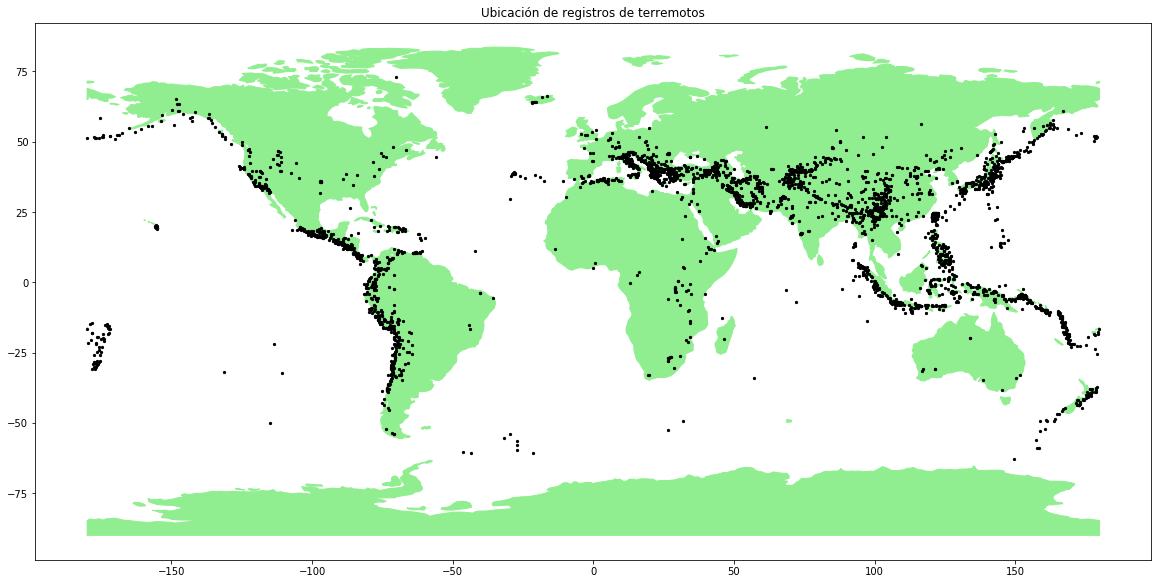

In [92]:
b0 = wd.plot(color='lightgreen', edgecolor='lightgreen', figsize=(20, 20))
eq100.plot(ax=b0, marker='o', color='black', markersize=5)
plt.title('Ubicación de registros de terremotos')

Así mismo, se muestra a continuación una representación espacial por densidad de puntos sobre la distribución de los registros de terremotos a nivel mundial. Esta figura se creo utilizando una aplicación de análisis espacial (heatmap) del software de Sistema de Información Geográfica (SIG) denominada QGIS Versión 2.8. Para la construcción de la siguiente figura, se carga el archivo resultante del análisis espacial y se plotea sobre la representación espacial de los paises. Para distinguir adecuadamente la información de la representación espacial de densidad de registros de terremotos, se crea una leyenda en escala de colores que representa, del 1 a más de 120, la acumulación de puntos respecto a su distribución.

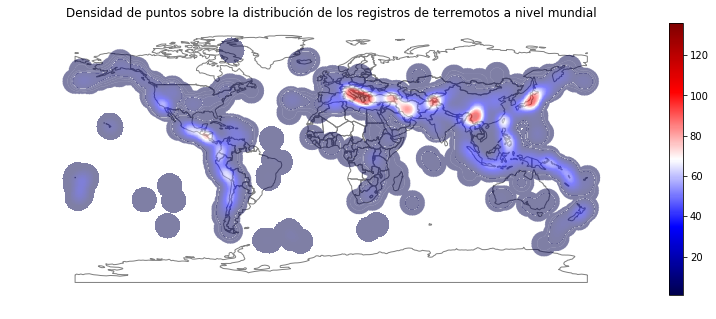

In [93]:
hm = gpd.GeoDataFrame.from_file("Dataset/heatmap.geojson")
b1 = wd.plot(color='', edgecolor='grey', figsize=(15, 5))
hm.plot(ax=b1, legend=True, column='DN', vmin='1', cmap='seismic', edgecolor='', alpha=0.5)
plt.title('Densidad de puntos sobre la distribución de los registros de terremotos a nivel mundial')
b1.set_axis_off();

Como se puede apreciar en la figura anterior, la mayor acumulación de registros espaciales de terremotos, representados por los colores rojos en la escala (valores del 100 en adelante), coinside con el la ubicación del denominado cinturón de terremotos, el cual lo podemos observar gráficamente en la siguiente imagen.
<img src="https://library.cqpress.com/cqresearcher/file.php?path=/images/CQ_Researcher/cqresrre19690319_im211.1.jpg" alt="Principal Earthquake Belts">

Para aclarar este punto resulta interesante observar la distribución de los terremotos en relación a las placas continentales, por tanto, se recurre a un dataframe hospedado en un sitio web el cual representa de forma geométrica vectorial las placas tectonicas. La fuente de esta información es un diseño digital de un mapa del Geochemistry Geophysics Geosystems (http://peterbird.name/oldFTP/PB2002/). A continuación, se accede al archivo correspondiente y se imprime dicho geodataframe.

In [23]:
url = "https://raw.githubusercontent.com/fraxen/tectonicplates/master/GeoJSON/PB2002_plates.json"
pc = gpd.read_file(url)
pc.head()

,LAYER,Code,PlateName,geometry
0,plate,AF,Africa,"POLYGON ((-0.4379 -54.8518, -0.914655 -54.4535..."
1,plate,AN,Antarctica,"POLYGON ((180 -65.749397, 180 -90, -180 -90, -..."
2,plate,SO,Somalia,"POLYGON ((32.1258 -46.9998, 32.1252 -46.9975, ..."
3,plate,IN,India,"POLYGON ((56.2652 14.6232, 57.0015 14.6601, 57..."
4,plate,AU,Australia,"(POLYGON ((-180 -32.30415, -180 -15.620711, -1..."


Tratando de ilustrar el punto de relación entre los terremotos y las placas tectonicas, debemos recordar que este tipo de eventos naturales son causados por un deslizamiento repentino en una falla, en donde las placas tectónicas siempre se mueven lentamente, pero se quedan atascadas en sus bordes debido a la fricción, es en este punto cuando el estrés en el borde supera la fricción, produciendose asi un terremoto el cual libera energía en ondas que viajan a través de la corteza terrestre y causan el temblor que sentimos.(www.usgs.gov)

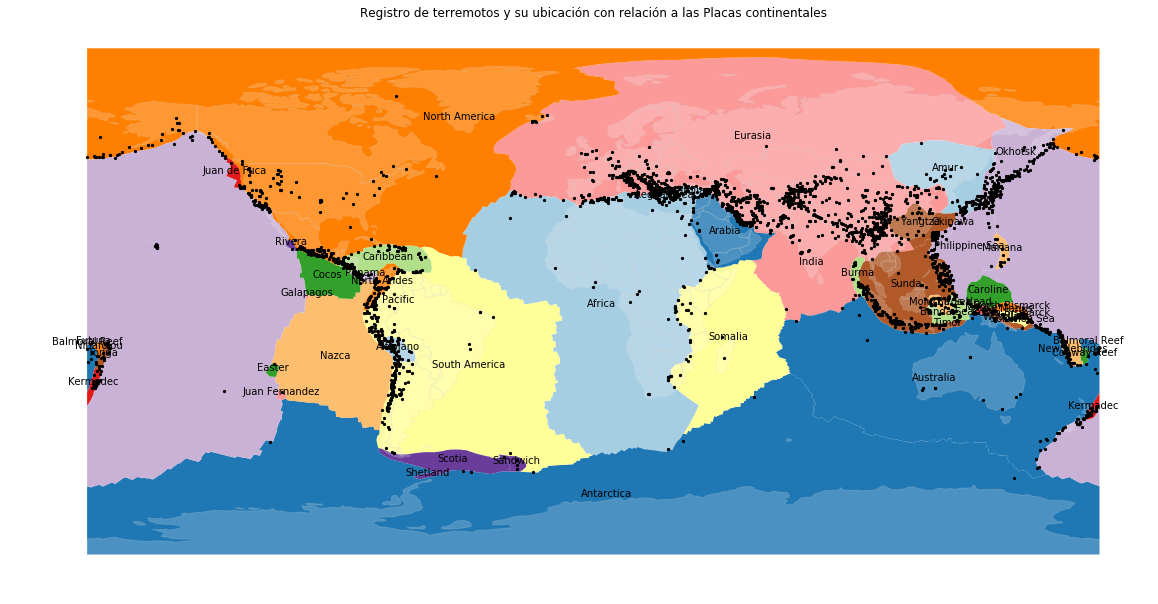

In [90]:
pcl = pc.plot(column='PlateName', figsize=(20, 20), cmap='Paired')
wbase = wd.plot(ax=pcl, color='white', alpha=0.2, edgecolor='lightgray')
eq100.plot(ax=wbase, marker='o', color='black', markersize=5);
plt.title('Registro de terremotos y su ubicación con relación a las Placas continentales')
pc.apply(lambda x: pcl.annotate(s=x.PlateName, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)
pcl.set_axis_off();

Por tanto, en la figura anterior notamos que la mayoria de los terremotos ocurren en los bordes de placas, formando un patron de cinturon alrededor de estas.

Así mismo, cabe señalar que los terremotos no solo estan asociados al movimiento de las placas tectonicas sino también a fallas activas distribuidas a nivel global. 
<p>Una falla es una fractura o zona de fracturas entre dos bloques de roca. Las fallas permiten que los bloques se muevan relativos entre sí. Este movimiento puede ocurrir rápidamente, en la forma de un terremoto - o puede ocurrir lentamente, en la forma de deslizamiento. (https://www.usgs.gov/)
<p>Para ilustrar este punto, se desarrollara una representación espacial en el que se muestre la distribución de los terremotos en relación con las fallas activas, para lo cual se consulta el archivo espacial vectorial de nombre (gem_active_faults) obtenido a traves del siguiente link (https://github.com/cossatot/gem-global-active-faults), mismo que pertenece a la Global Earthquake Model Foundation. A continuación, la figura ilustrativa

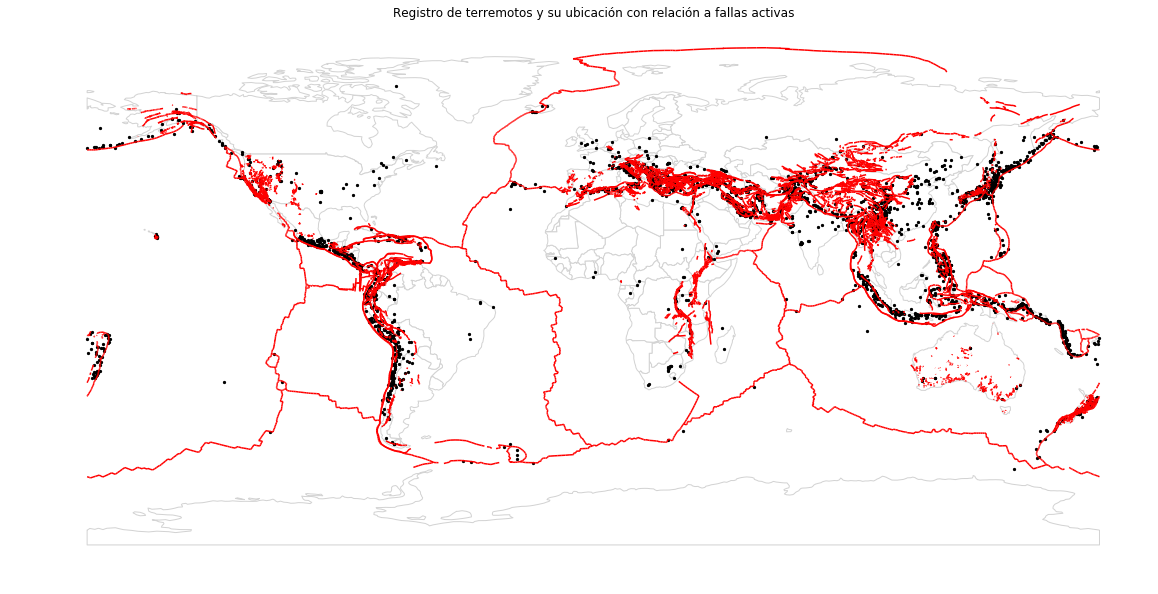

In [94]:
faults = gpd.GeoDataFrame.from_file('Dataset/gem_active_faults.shp')

wbase1 = wd.plot(color='white', edgecolor='lightgray', figsize=(20, 20))
fbase = faults.plot(color='red', ax=wbase1)
eq100.plot(ax=fbase, marker='o', color='black', markersize=5)
plt.title('Registro de terremotos y su ubicación con relación a fallas activas')
wbase1.set_axis_off();

Evidentemente se observa que la distribución de los terremotos corresponde, en la mayoria de los casos, con la ubicación de las fallas activas.

## Registros de terremotos a nivel local

Para el siguiente análisis, se calcula la cantidad de terremotos que se han registrado por sitio, y se visualizan los 20 con mayor número de estos

In [25]:
eq100.LOCATION_NAME.value_counts().head(20)

CHINA:  YUNNAN PROVINCE                 36
CHINA:  SICHUAN PROVINCE                31
SOLOMON ISLANDS                         31
RUSSIA:  KURIL ISLANDS                  27
VANUATU ISLANDS                         23
ITALY:  N                               20
TAIWAN                                  18
ITALY:  CENTRAL                         17
TURKEY                                  15
FIJI ISLANDS                            14
CHILE:  NORTHERN                        14
INDONESIA:  JAVA                        13
JAPAN:  SANRIKU                         12
CHINA:  GANSU PROVINCE                  12
NEW CALEDONIA:  LOYALTY ISLANDS         11
PERU                                    11
ITALY:  S                               11
RUSSIA:  KAMCHATKA                      11
PAPUA NEW GUINEA:  BISMARCK SEA         11
SOLOMON ISLANDS:  SANTA CRUZ ISLANDS    10
Name: LOCATION_NAME, dtype: int64

Se observa que la lista de sitios con más terremotos registrados la encabezan lugares como: la Provincia de Yunnan en China con 36 terremotos, las Islas Solomon, con 31 terremotos, y con igual cantidad la Provincia de Sichian en China, entre otros más.

<h2>Terremotos registrados por país</h2>
<p>La lista de paises que contine el dataframe de Terremotos son los siguientes:

In [26]:
sorted(eq100.COUNTRY.unique())

['AFGHANISTAN',
 'ALBANIA',
 'ALGERIA',
 'ANTARCTICA',
 'ANTIGUA AND BARBUDA',
 'ARGENTINA',
 'ARMENIA',
 'ATLANTIC OCEAN',
 'AUSTRALIA',
 'AUSTRIA',
 'AZERBAIJAN',
 'AZORES (PORTUGAL)',
 'BANGLADESH',
 'BELGIUM',
 'BERING SEA',
 'BHUTAN',
 'BOLIVIA',
 'BOSNIA-HERZEGOVINA',
 'BRAZIL',
 'BULGARIA',
 'BURUNDI',
 'CAMEROON',
 'CANADA',
 'CENTRAL AFRICAN REPUBLIC',
 'CHILE',
 'CHINA',
 'COLOMBIA',
 'COMOROS',
 'CONGO',
 'COSTA RICA',
 'CROATIA',
 'CUBA',
 'CYPRUS',
 'CZECH REPUBLIC',
 'DJIBOUTI',
 'DOMINICAN REPUBLIC',
 'ECUADOR',
 'EGYPT',
 'EL SALVADOR',
 'ETHIOPIA',
 'FIJI',
 'FRANCE',
 'GABON',
 'GEORGIA',
 'GERMANY',
 'GHANA',
 'GREECE',
 'GUADELOUPE',
 'GUATEMALA',
 'GUINEA',
 'HAITI',
 'HONDURAS',
 'HUNGARY',
 'ICELAND',
 'INDIA',
 'INDIAN OCEAN',
 'INDONESIA',
 'IRAN',
 'IRAQ',
 'ISRAEL',
 'ITALY',
 'JAMAICA',
 'JAPAN',
 'JORDAN',
 'KAZAKHSTAN',
 'KENYA',
 'KERMADEC ISLANDS (NEW ZEALAND)',
 'KYRGYZSTAN',
 'LAOS',
 'LEBANON',
 'LIBYA',
 'MACEDONIA',
 'MADAGASCAR',
 'MALAWI',
 'MALAY

Para analizar los datos de terremotos por país se crea el siguiente gráfico de barras, en el que unicamente se plotean los 20 paises que encabezan la lista con mayor cantidad de registros

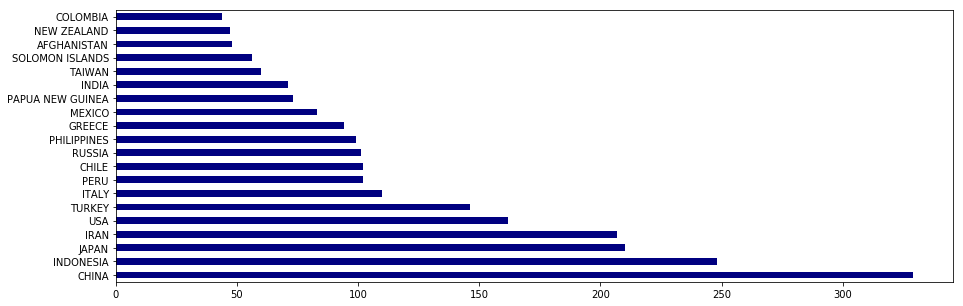

In [27]:
eq100.COUNTRY.value_counts().head(20).plot.barh(color='navy', figsize=(15,5))

En este se observa que China es el pais que presenta un mayor número de terremotos en estos 100 años, registrado más de 300, seguido de Indonesia con alrededor de 250 terremotos, y en el rango entre de 200 a 250 terremotos estan paises como Japón e Irán, entre otros que encabezan la lista.

In [28]:
y = eq100.COUNTRY.value_counts()
eq_ncountry = mc.Equal_Interval(y, k=5)
print(eq_ncountry)
print()
print("Nota: No tomar en consideración los valores decimales que muentran los rangos")

               Equal Interval              
 
 Lower            Upper               Count
          x[i] <=  66.600               118
 66.600 < x[i] <= 132.200                 9
132.200 < x[i] <= 197.800                 2
197.800 < x[i] <= 263.400                 3
263.400 < x[i] <= 329.000                 1

Nota: No tomar en consideración los valores decimales que muentran los rangos


Al realizar una clasificación de intervalos iguales aplicada al número de terremotos en relación con la cantidad de paises que registran dicha cantidad se tiene que: existen 118 paises que registran en su haber menos de 66 terremotos, 9 paises con una cantidad de terremotos que oscila entre los 66 a 132, 2 paises que registran cantidades de terremotos entre los 132 a 197, 3 paises entre los 197 a 263, y un único país que registra entre los 263 a 329 terremotos, el cual, como se evidencio en el gráfico anterior, corresponde a China.

Dado el hecho que resultaría interesante mostrar espacialmente dicha información respecto al número de terremotos registrados por país en formato de representación espacial coroplética, será necesario unificar el dataframe de terremotos (el cual corresponde a geometría de puntos) con el dataframe de paises (con geometría de poligonos), lo cual se logra en la siguiente linea

In [29]:
idx = eq100.reset_index(drop=True)
idx['EQBYC'] = idx.COUNTRY.map(idx.groupby("COUNTRY")["COUNTRY"].count())
idx['MAXMAG'] = idx.COUNTRY.map(idx.groupby("COUNTRY")["EQ_PRIMARY"].max())
idx['MAXINTS'] = idx.COUNTRY.map(idx.groupby("COUNTRY")["INTENSITY"].max())
idx['TDEATHS'] = idx.COUNTRY.map(idx.groupby("COUNTRY")["TOTAL_DEATHS"].sum())
idx['TINJU'] = idx.COUNTRY.map(idx.groupby("COUNTRY")["TOTAL_INJURIES"].sum())
idx['TDAMAGED'] = idx.COUNTRY.map(idx.groupby("COUNTRY")["TOTAL_DAMAGE_MILLIONS_DOLLARS"].sum())

eq100_2 = idx.loc[:,['COUNTRY','EQBYC', 'MAXMAG', 'MAXINTS', 'TDEATHS', 'TINJU', 'TDAMAGED']]
eq100_2 = eq100_2.set_index('COUNTRY')
eq100_wd = pd.merge(wd, eq100_2, how='left', on='COUNTRY')
eq100_wd['centroid'] = eq100_wd['geometry'].centroid

Una vez unificadas las bases de datos, se procede a representar espacialmente la información usando la clasificación por intervalos iguales

(-198.0, 198.0, -98.6822565, 92.3273865)

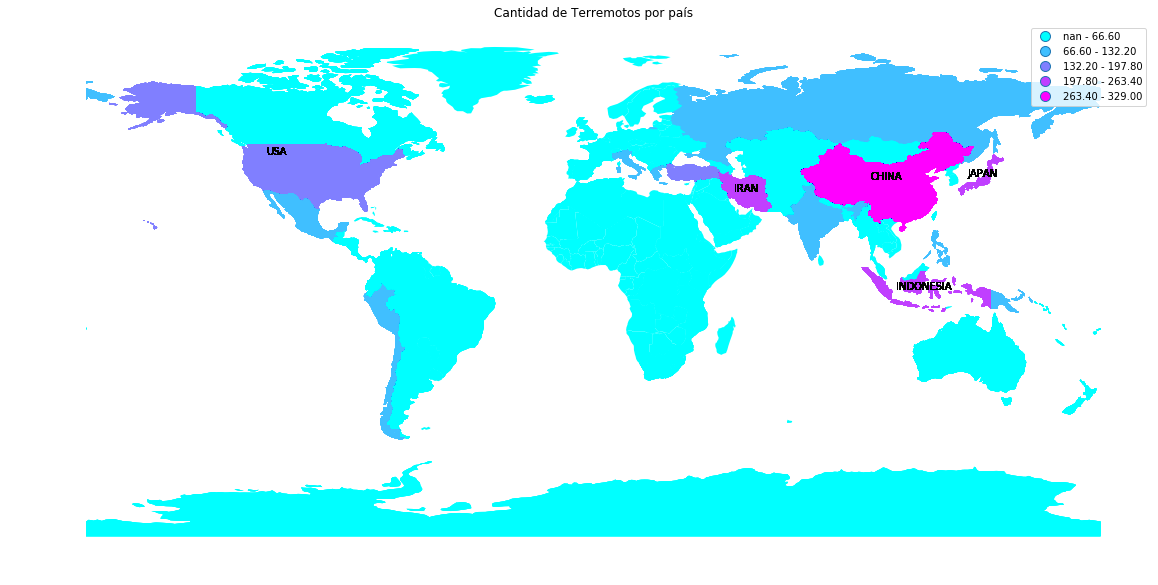

In [30]:
fig, ax = plt.subplots(1, figsize=(20, 20))
eq100_wd.plot(column='EQBYC',legend=True, cmap='cool', scheme='Equal_Interval', ax=ax)
plt.title('Cantidad de Terremotos por país')

for point in eq100_wd.loc[['CHINA', 'IRAN', 'USA', 'INDONESIA', 'JAPAN'],:].iterrows():
    ax.text(point[1]['centroid'].x,
            point[1]['centroid'].y,
            point[0],
            horizontalalignment='center',
            fontsize=10)
ax.axis('off')

El resultado nos refuerza, de forma visual, que paises como China, Indonesia, Japón, Iran, USA, entre otros, son aquellos que registran una mayor cantidad de terremotos en los últimos 100 años

<h1>Caracteristicas de los terremotos</h1>

La severidad de un terremoto puede expresarse en términos de intensidad y magnitud, sin embargo, los dos términos son bastante diferentes y a menudo se confunden. La intensidad se basa en los efectos observados por las personas respecto a la sacudida del suelo, edificios y características naturales. Varía de un lugar a otro dentro de la región perturbada dependiendo de la ubicación del observador con respecto al epicentro del terremoto. La magnitud está relacionada con la cantidad de energía sísmica liberada en el hipocentro del terremoto. Se basa en la amplitud de las ondas sísmicas registradas en instrumentos que tienen una calibración común. La magnitud de un terremoto se representa, por lo tanto, mediante un único valor determinado por el instrumento. <p align = "right"><b><i>(Fuente: US Geological Survey (1997) The severity of an earthquake. U.S. Government Printing Office)</i></b>

<h2>Magnitudes</h2>
<p>La magnitud de un terremoto se determina a partir del logaritmo de la amplitud de las ondas registradas por sismógrafos. Los ajustes se incluyen en la fórmula de magnitud para compensar la variación en la distancia entre los diversos sismógrafos y el epicentro de los terremotos. En la escala Richter, la magnitud es expresada en números enteros y fracciones decimales. Debido a la base logarítmica de la escala, cada aumento total de magnitud representa un aumento de diez veces en la amplitud medida; como estimación de la energía, cada paso de número entero en la escala de magnitud corresponde a la liberación de aproximadamente 31 veces más energía que la cantidad asociada con el valor de número entero precedente.
<p>El valor considerado para el análisis contiene la magnitud primaria del terremoto. Hay varias escalas diferentes para medir las magnitudes de los terremotos. La magnitud primaria se elige entre las escalas de magnitud disponibles en este orden: Mw Magnitude, Ms Magnitude, Mb Magnitude, Ml Magnitude, mfa Magnitude, Unknown Magnitude.
<p align = "right"><b><i>(Fuente: US Geological Survey (1997) The severity of an earthquake. U.S. Government Printing Office)</i></b>
<p>A continuación, un video en el que se explica las diferencias que existen entre los valores de escala por magnitud:

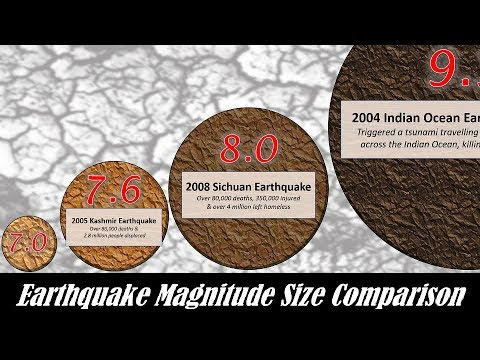

In [31]:
YouTubeVideo('DWFxIgv3Jc0')

In [32]:
eq100.EQ_PRIMARY.sort_values().unique()

array([1.6, 2.1, 2.2, 3.1, 3.2, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 9. , 9.1, 9.2, 9.5, nan])

Una vez hemos comprendido las diferencias entre las magnitudes, será importante conocer cuales de estan han sido las más frecuentes según la información del dataframe del terremotos, para lo cual se crea el siguiente gráfico

Text(0.5, 1.0, 'Cantidad de terremotos ocurridos según magnitudes registradas')

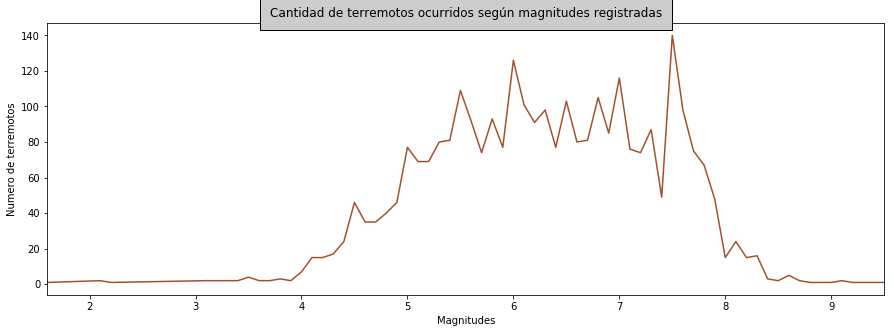

In [33]:
eq100['EQ_PRIMARY'].value_counts().sort_index().plot(color='sienna', figsize=(15, 5))
plt.xlabel('Magnitudes')
plt.ylabel('Numero de terremotos')
plt.title('Cantidad de terremotos ocurridos según magnitudes registradas', bbox={'facecolor':'0.8', 'pad':10})

En este se apresia que la mayor cantidad de terremotos ocurridos han estado en el rango entre los 5 y 7.5 en la escala de magnitudes, siendo las más comunes la de 7.6 y la de 6.2

Respecto a la distribución de estas magnitudes, al plotearlas sobre representación espacial de placas tectonicas y de paises, se observa que aquellos terremotos con magnitudes superiores a los 6.0 se han dado alrededor del planeta y siguiendo el patrón de distribución sobre los bordes de placa.

Terremotos según registros de magnitud


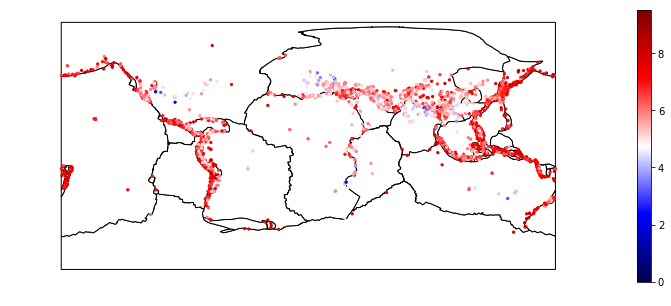

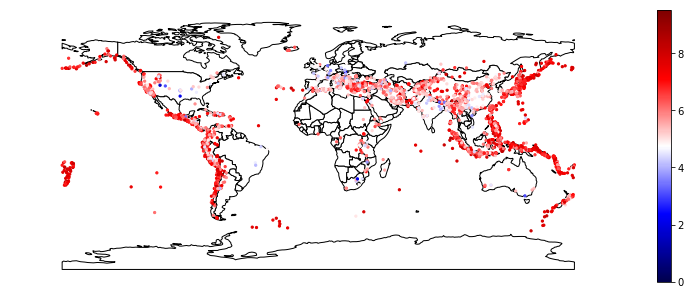

In [95]:
print("Terremotos según registros de magnitud")
b2 = pc.plot(color='white', edgecolor='black', figsize=(20, 5))
b3 = wd.plot(color='white', edgecolor='black', figsize=(20, 5))
eq100.plot(ax=b2, figsize=(20, 5), legend=True, column='EQ_PRIMARY',cmap='seismic', vmin='0.00', vmax='9.50', marker='o', markersize=5)
eq100.plot(ax=b3, figsize=(20, 5), legend=True, column='EQ_PRIMARY',cmap='seismic', vmin='0.00', vmax='9.50', marker='o', markersize=5)
b2.set_axis_off()
b3.set_axis_off();

De dicha distribución de las magnitudes más altas se aprecia también que la aglomeración de estos puntos (simbolizados en color rojo en la representación espacial) es más evidente en los bordes del denominado Cinturón de fuego del Pacífico, el cual se puede apreciar en la siguiente imágen para compararlo con las figuras anteriores
<img src="https://www.geoenciclopedia.com/wp-content/uploads/2015/09/cinturon_de_fuego_1200.png" alt="Cinturon de fuego del Pacifico">

Desde el punto de vista de los terremotos con magnitudes más altas registradas por pais, tenemos que paises como Chile, Estados Unidos, Japón, Indonesia, entre otros, son los que encabezan la lista, tal y como se puede observar a continuación

In [35]:
eq100.groupby('COUNTRY')['EQ_PRIMARY'].max().sort_values(ascending=False).head(10)

COUNTRY
CHILE            9.50
USA              9.20
JAPAN            9.10
INDONESIA        9.10
RUSSIA           9.00
INDIA            8.60
PERU             8.40
CHINA            8.30
ATLANTIC OCEAN   8.30
PHILIPPINES      8.30
Name: EQ_PRIMARY, dtype: float64

Si el anterior dato lo ploteamos sobre la representación espacial de paises, se observa que efectivamente los paises mencionados aparecen en el rango de los que registran mayores magnitudes en terremotos

(-198.0, 198.0, -98.6822565, 92.3273865)

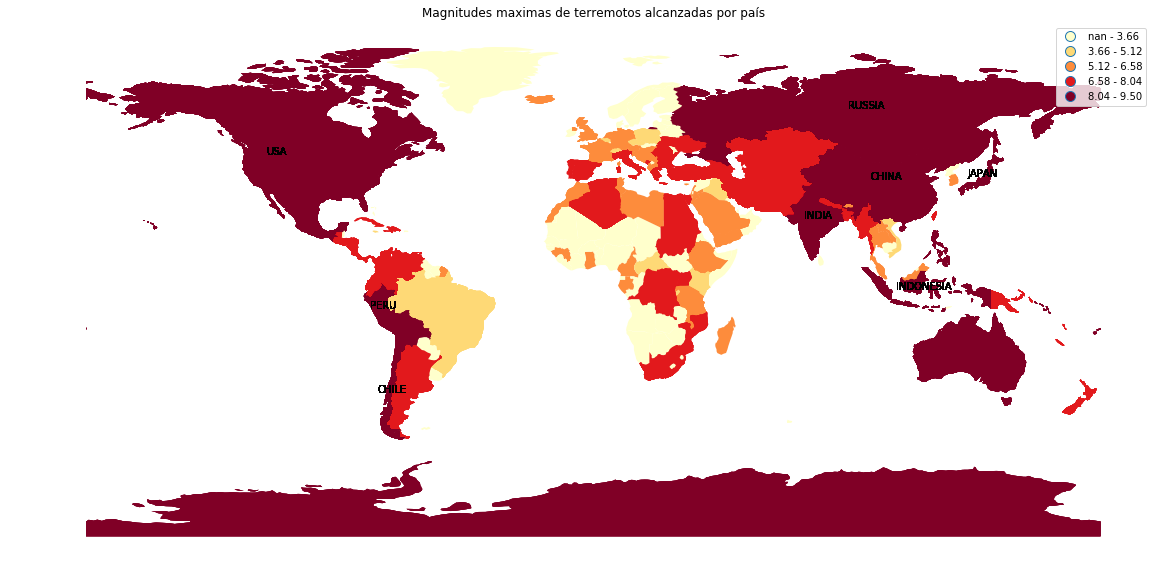

In [36]:
fig, ax = plt.subplots(1, figsize=(20, 20))

eq100_wd.plot(column='MAXMAG',legend=True, cmap='YlOrRd', scheme='Equal_Interval', ax=ax)
plt.title('Magnitudes maximas de terremotos alcanzadas por país')

for point in eq100_wd.loc[['RUSSIA', 'CHILE', 'USA', 'PERU', 'INDIA', 'JAPAN', 'INDONESIA', 'CHINA'],:].iterrows():
    ax.text(point[1]['centroid'].x,
            point[1]['centroid'].y,
            point[0],
            horizontalalignment='center',
            fontsize=10)
ax.axis('off')

Como se mencionó anteriormente, la mayor cantidad de terremotos registrados han sido de 7.5 de magnitud, por lo que si definieramos este dato como un límite con el fin de establecer dos categorias (mayores y menores a esta magnitud) sobre la linea de tiempo estudiada, se lograría el siguiente gráfico

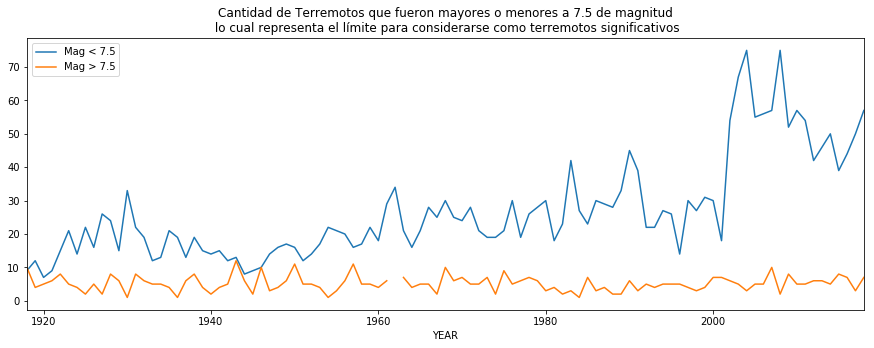

In [37]:
mag_y = eq100.groupby(['YEAR', eq100.EQ_PRIMARY >= 7.5]).size()
table = mag_y.unstack('EQ_PRIMARY')
table.plot(figsize=(15,5))
plt.title('Cantidad de Terremotos que fueron mayores o menores a 7.5 de magnitud\n lo cual representa el límite para considerarse como terremotos significativos')
plt.legend(['Mag < 7.5', 'Mag > 7.5'])

Se observa que a pesar de ser el que en más ocaciones ha ocurrido, no existe una acumulación de eventos de esta magnitud a lo largo del tiempo. Por el contrario, los menores a esta magnitud si han visto un aumento en la frecuencia de ocurrencia en los años posteriores al 2000

<h2>Intensidades registradas en terremotos</h2>
<p>El efecto de un terremoto en la superficie de la Tierra se llama intensidad. La escala de intensidad consiste en una serie de ciertas respuestas clave como el despertar de las personas, el movimiento de los muebles, el daño a las chimeneas, y finalmente la destrucción total.
<p>La intesidad se mide con la escala de Intensidad Mercalli Modificada (MM), la cual esta compuesta por 12 niveles crecientes de intensidad que van desde sacudidas imperceptibles hasta destrucción catastrófica, y está designada por números romanos. No tiene una base matemática, sino que es una clasificación arbitraria basada en los efectos observados. El valor de Intensidad Mercalli Modificada asignado a un sitio específico después de un terremoto tiene una medida de gravedad más significativa para el no científico que la magnitud porque la intensidad se refiere a los efectos realmente experimentados en ese lugar. 
    <p align = "right"><b><i>(Fuente: US Geological Survey (1997) The severity of an earthquake. U.S. Government Printing Office)</i></b>
<p>En la base de datos analizada, la escala de intensidades se clasifican de la siguiente manera:

In [38]:
sorted(eq100['INTENSITY'].unique())

[nan, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]

De este modo se puede apreciar que en intensidad sismica, la mínima registrada es de 2.0  y la máxima 12.0

Si se analiza la distribución espacial de los eventos sismicos con relación a las intensidades, se nota un patrón de distribucion para aquellos terremotos con grados mayores, los cuales se extiende desde europa hasta el extremo noreste del continente asiatico (sitio conocido como el estrecho de Bering), coincidiendo en gran medida con el borde de subducción de la placa eurasia. Otro patron de distribución de eventos con intensidades sismicas altas lo encontramos en sudamerica, especificamente a lo largo de la costa pacífica, el cual a su vez coincide con el borde de placa Nazca.

Terremotos según registros de intensidad


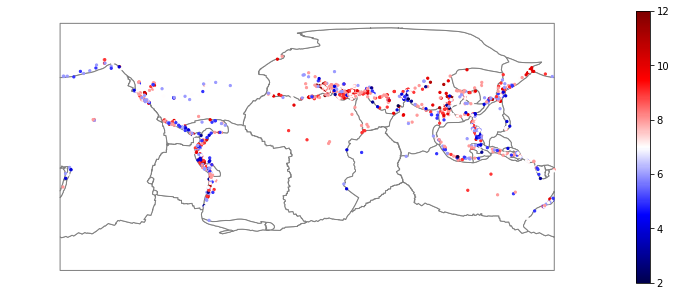

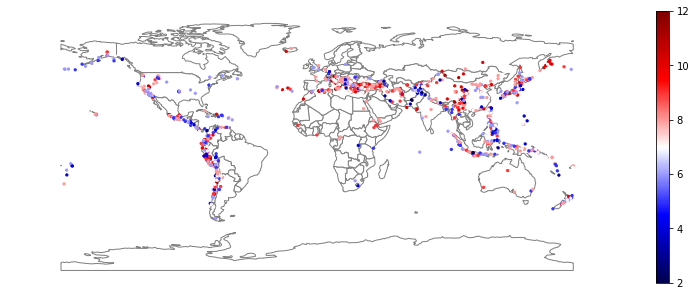

In [39]:
print("Terremotos según registros de intensidad")
b4 = pc.plot(color='white', edgecolor='gray', figsize=(20, 5))
b5 = wd.plot(color='white', edgecolor='gray', figsize=(20, 5))
eq100.plot(ax=b4, figsize=(20, 5), legend='INTENSITY', column='INTENSITY',cmap='seismic', vmin='2.00', vmax='12.00', marker='o', markersize=5)
eq100.plot(ax=b5, figsize=(20, 5), legend='INTENSITY', column='INTENSITY',cmap='seismic', vmin='2.00', vmax='12.00', marker='o', markersize=5)
b4.set_axis_off()
b5.set_axis_off();

Por su parte, al contrastar el número de eventos según su intensidad y su comportamiento a lo largo del tiempo, se observa que en la mayoria de los años analizados la cantidad de veces que se retipen intensidades entre los 7.0 y 8.0 ha sido constante.

In [40]:
intens_y = pd.crosstab(eq100.INTENSITY, eq100.YEAR)
intens_y.style.highlight_max(color='lightgreen', axis=0)

YEAR,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2018
INTENSITY,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
3.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,3,2,0
4.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2,2,0,0,0,1,0,1,0,2,2,0,0,6,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,2,0,0,0,1,0,0,4,4,10,5,0
5.0,0,0,0,0,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,4,1,0,1,2,0,3,2,2,0,0,2,1,1,0,2,3,1,4,4,0,0,1,1,0,1,1,1,0,0,0,0,1,1,1,2,0,1,2,0,0,1,13,9,8,1
6.0,0,0,0,0,0,0,0,0,0,1,3,1,0,0,0,1,0,0,0,0,1,0,0,1,0,2,0,0,1,0,0,0,3,0,0,0,1,1,1,1,0,1,1,0,1,0,0,3,2,1,3,1,2,4,4,2,3,4,1,4,2,0,3,2,3,5,5,5,4,3,5,7,8,3,0,1,3,0,3,2,0,2,2,3,1,7,6,4,0,2,1,0,5,0,0,2,6,4,11,1
7.0,5,1,0,2,2,1,0,2,2,5,3,1,2,0,5,0,0,1,1,2,1,3,1,1,0,1,0,3,1,3,2,0,2,0,4,1,1,1,4,1,2,3,0,2,4,3,2,3,5,3,4,4,2,4,3,4,2,5,3,4,2,2,5,3,4,11,3,8,6,2,4,3,7,5,2,2,2,4,0,4,1,4,3,0,3,3,0,1,1,2,0,0,2,2,1,3,4,4,9,0
8.0,0,4,1,4,2,2,0,3,0,2,2,2,3,4,3,0,3,6,3,3,2,1,3,6,6,1,3,3,3,0,2,3,1,0,5,0,2,2,2,0,1,3,2,3,7,1,3,3,4,4,5,5,4,2,2,8,1,5,5,1,6,3,4,5,2,10,7,5,3,4,2,3,4,6,4,2,0,3,3,3,4,2,0,4,3,2,1,1,1,3,3,0,0,1,1,2,3,2,5,2
9.0,2,1,1,0,0,4,5,3,3,1,5,2,5,4,1,3,0,1,4,2,1,2,2,2,2,0,1,0,2,3,1,2,1,2,2,2,1,4,3,2,2,0,1,2,2,2,0,0,5,3,2,3,1,5,2,1,2,4,6,1,2,4,2,1,0,3,1,2,0,0,1,2,1,1,2,1,3,1,1,0,0,2,1,1,1,1,1,0,0,0,1,0,2,0,0,0,1,1,1,0
10.0,2,1,2,0,2,5,1,0,1,2,2,2,2,2,4,3,2,2,2,2,2,2,3,0,3,1,2,1,1,1,5,3,0,0,1,3,4,2,0,3,2,4,2,0,0,1,2,2,1,3,2,1,4,1,2,1,0,1,3,0,0,0,2,0,1,0,0,0,1,1,2,0,0,1,0,0,0,0,0,2,0,2,0,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Sin embargo, a lo largo del tiempo estudiado también se observan otras variantes en la cantidad de terremos y la intensidad. Por ejemplo, en la decada de los años 20, se observa un número considerable de eventos con intensidad de 12.0, al igual que ocurren a finales de los años cuarenta y en la decada de los 50 en relación con terremotos de intensidad de 10.0. Con relación a las intensidades registrados en los últimos años (2012 en adelante) se observa que la mayoria de terremotos han sido entre los  4.0, 5.0 y 6.0

Lo explicado anteriormente se puede apreciar visual y comparativamente en el siguiente grafico

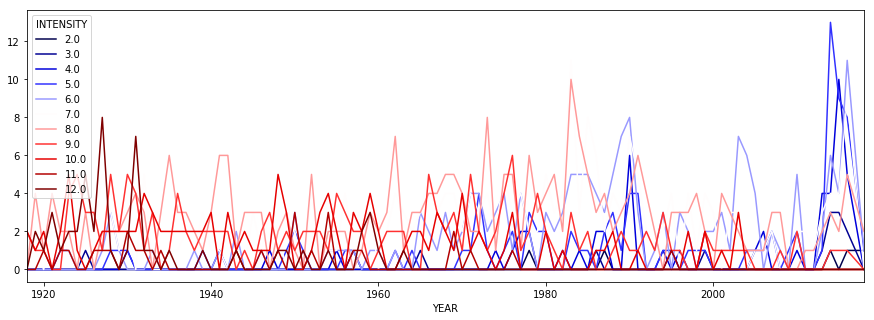

In [41]:
pd.crosstab(eq100.YEAR, eq100.INTENSITY).plot(figsize=(15,5), cmap='seismic')

Ahora bien, al analizar comparativamente la cantidad de veces que se han registrado las diferentes intensidades en el periodo de tiempo estudiado, se observa en el siguiente gráfico que, como ya se menciono, las intensidades más frecuentes han sido las de 8.0 y 7.0, seguidas de las de 6.0 y 9.0

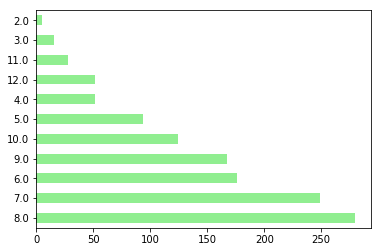

In [42]:
eq100['INTENSITY'].value_counts(sort=True).plot.barh(color='lightgreen')

Al filtrar los terremotos que son de estas intensidades, se aprecia que estos han ocurrido en diversos años y en paises como: Yemen, Venezuela, Vanuatu, Puerto Rico, entre otros paises

In [43]:
intens_8y7 = eq100[eq100.INTENSITY.isin([8.0, 7.0])]
intens_8y7.groupby(['COUNTRY', 'LOCATION_NAME', 'YEAR']).INTENSITY.max().tail(10).sort_values(ascending=False)

COUNTRY        LOCATION_NAME                                YEAR
YEMEN          YEMEN:  RAZIH                                1941   8.00
               YEMEN:  DHAMAR                               1982   8.00
VENEZUELA      VENEZUELA                                    1967   8.00
VANUATU        VANUATU ISLANDS:  LUGANVILLE, LAMAP          1973   8.00
VENEZUELA      VENEZUELA                                    1986   7.00
VANUATU        VANUATU ISLANDS:  ESPIRITU SANTO, PORT VILA  1971   7.00
               VANUATU ISLANDS:  ESPIRITU SANTO, LUGANILLE  1973   7.00
               VANUATU ISLANDS                              2010   7.00
UZBEKISTAN     UZBEKISTAN:  GAZLI                           1976   7.00
USA TERRITORY  PUERTO RICO                                  1918   7.00
Name: INTENSITY, dtype: float64

Respecto a los terremotos con máximas intensidades, entre los 10.0 y 12.0 según la escala de medición, se registran en paises como: USA (en varias ocaciones), Turquia (en varias ocaciones), Uzbekistan, entre otros.

In [44]:
intens_10a12 = eq100[eq100.INTENSITY.isin([10.0, 11.0, 12.0])]
intens_10a12.groupby(['COUNTRY', 'LOCATION_NAME', 'YEAR']).INTENSITY.max().tail(20).sort_values(ascending=False)

COUNTRY       LOCATION_NAME                        YEAR
USA           NEVADA:  CEDAR MOUNTAIN              1932   12.00
              NEVADA:  STILLWATER RANGE            1954   12.00
TURKEY        TURKEY:  LADIK, SAMSUN, HAVZA        1943   11.00
USA           CALIFORNIA:  SAN FERNANDO            1971   11.00
              CALIFORNIA:  KERN COUNTY             1952   11.00
              ALASKA:  LITUYA BAY                  1958   11.00
UZBEKISTAN    UZBEKISTAN:  GAZLI, BUKHARA          1976   10.00
TURKEY        TURKEY:  NIKSAR, ERBAA               1942   10.00
              TURKEY:  KIRSEHIR                    1938   10.00
              TURKEY:  MANYAS, BURSA, BALIKESIR    1964   10.00
              TURKEY:  MUDURNU, ADAPAZARI          1967   10.00
              TURKEY:  MURADIYE                    1976   10.00
USA           ALASKA                               1964   10.00
TURKEY        TURKEY: KARLIOVA                     1949   10.00
TURKMENISTAN  TURKMENISTAN:  ASHKHABAD          

Al mapear las intensidades máximas registradas por un país a lo largo de estos 100 años, se tiene que paises como Estados Unidos, Turquia, China, Rusia, India, México, destacán en el rango entre los 10.40 a 12.00 en la escala

(-198.0, 198.0, -98.6822565, 92.3273865)

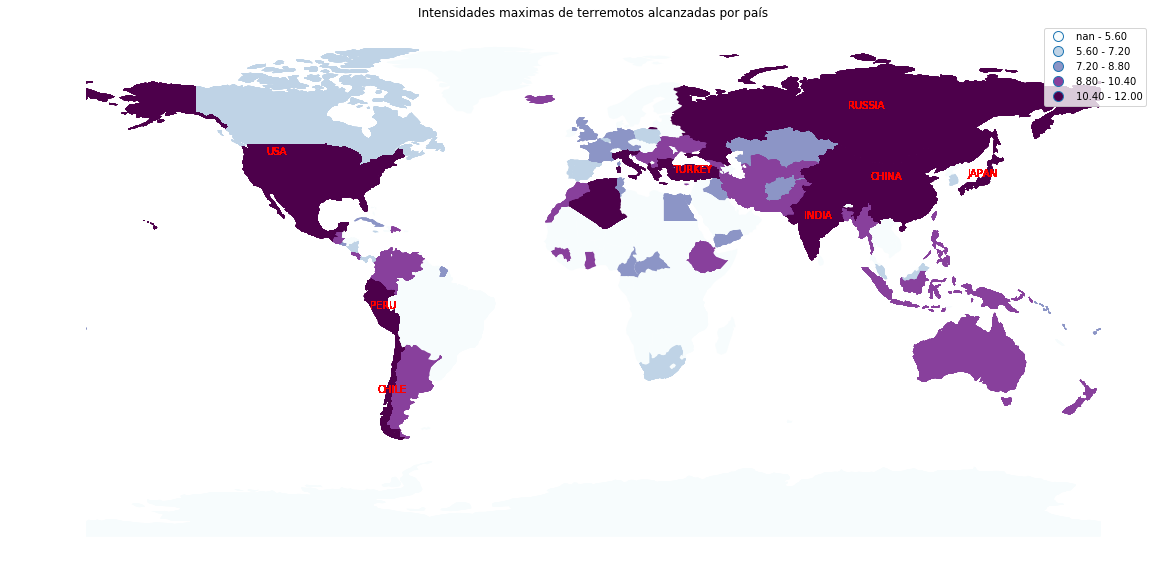

In [45]:
fig, ax = plt.subplots(1, figsize=(20, 20))

eq100_wd.plot(column='MAXINTS',legend=True, cmap='BuPu', scheme='Equal_Interval', ax=ax)
plt.title('Intensidades maximas de terremotos alcanzadas por país')

for point in eq100_wd.loc[['RUSSIA', 'CHILE', 'USA', 'PERU', 'INDIA', 'JAPAN', 'TURKEY', 'CHINA'],:].iterrows():
    ax.text(point[1]['centroid'].x,
            point[1]['centroid'].y,
            point[0],
            horizontalalignment='center',
            fontsize=10, color='red')
ax.axis('off')

<h2>Peligro asociado a terremotos: Tsunamis</h2>
<p>Uno de los peligros asociados a los terremotos es el de Tsunamis. Los tsunamis son olas gigantes causadas por terremotos o erupciones volcánicas bajo el mar. En las profundidades del océano, las olas del tsunami no aumentan dramáticamente en altura. Pero a medida que las olas viajan hacia el interior, se acumulan a alturas cada vez más altas a medida que disminuye la profundidad del océano. La velocidad de las olas del tsunami depende de la profundidad del océano y no de la distancia a la fuente de la ola. Las olas de tsunami pueden viajar tan rápido como los aviones de reacción sobre aguas profundas, sólo ralentizando cuando llegan a aguas poco profundas. Mientras que los tsunamis son a menudo referidos como maremotos, este nombre es desalentado por los oceanógrafos porque las mareas tienen poco que ver con estas olas gigantes.
<p align="right"><b><i>(oceanservice.noaa.gov)</i></b></p>
<p>A continuación, un video de como se genera un tsunami (https://earthquake.alaska.edu/).

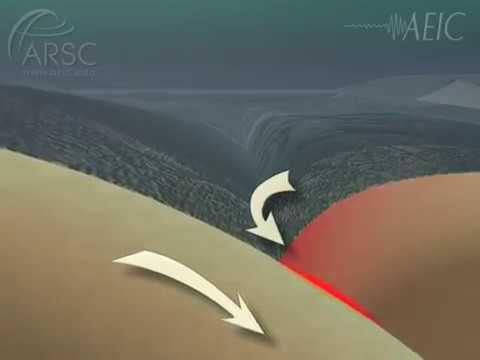

In [46]:
YouTubeVideo('WuTbDnd_8nA')

La base de datos sobre terremotos aquí analizada, presenta un total de 871 tsumanis generados por terremotos en los últimos 100 años 

In [47]:
eq100.FLAG_TSUNAMI.count()

871

Realizando el análisis del número de tsunamis ocurridos en el lapso de los últimos 100 años, se obtiene como resultado que la mayor cantidad de estos han ocurrido en 1995 y 1938 con un total de 18, le sigue 1928 con un total de 17, en el rango de los 15 estan los años 1961, 1968, 2007, 2010; entre otros más; datos que se pueden apreciar en la siguiente lista

YEAR  FLAG_TSUNAMI
1938  Tsu             18
1995  Tsu             18
1928  Tsu             17
1968  Tsu             15
1961  Tsu             15
2010  Tsu             15
2007  Tsu             15
2014  Tsu             14
1994  Tsu             14
1987  Tsu             13
Name: FLAG_TSUNAMI, dtype: int64
YEAR  FLAG_TSUNAMI
1986  Tsu             4
1947  Tsu             4
1921  Tsu             4
1998  Tsu             4
1954  Tsu             3
1945  Tsu             3
1942  Tsu             2
1943  Tsu             2
1999  Tsu             2
1944  Tsu             1
Name: FLAG_TSUNAMI, dtype: int64


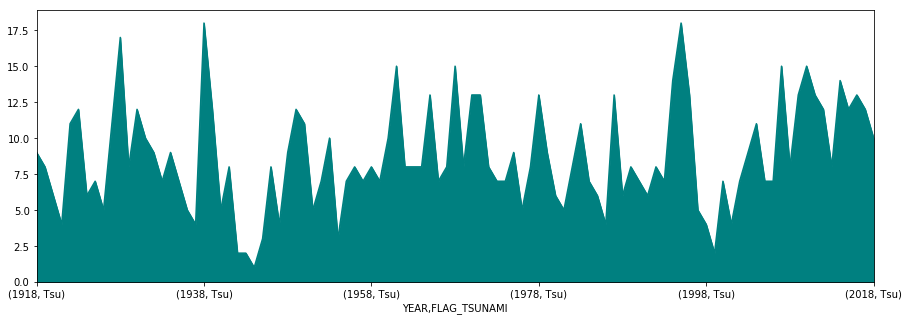

In [48]:
tsu100_y = eq100.groupby('YEAR')['FLAG_TSUNAMI'].value_counts().sort_index()
print(tsu100_y.sort_values(ascending=False).head(10))
print(tsu100_y.sort_values(ascending=False).tail(10))
tsu100_y.plot(kind='area', color='teal', figsize=(15, 5))

De la gráfica se observa que a lo largo de estos cien años, han ocurrido tsunamis con frecuencia, y resulta interesante que la linea de tiempo sobre las cantidades presenta patrones de distribución entre cantidades considerables de tsumanis y otros con menos cantidad. Además, destacar que se evidencian años en donde la cantidad de estos eventos han sido pocos, como por ejemplo en los años 1942-43-44 o en los años 1998-99. En otros donde la cantidad ha sido considerable como el caso del año 1995 o el de 1938

COUNTRY    YEAR  FLAG_TSUNAMI
JAPAN      1938  Tsu             11
           1961  Tsu              7
INDONESIA  1994  Tsu              6
RUSSIA     1971  Tsu              6
INDONESIA  2009  Tsu              5
RUSSIA     1978  Tsu              5
JAPAN      1968  Tsu              5
CHILE      2014  Tsu              4
JAPAN      2011  Tsu              4
           1964  Tsu              4
Name: FLAG_TSUNAMI, dtype: int64


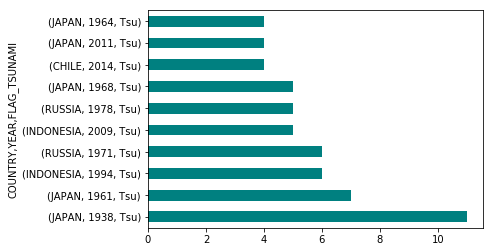

In [49]:
tsu100 = eq100.groupby(['COUNTRY','YEAR'])['FLAG_TSUNAMI'].value_counts().sort_values(ascending=False).head(10)
print(tsu100)
tsu100.plot.barh(color='teal')

Al analizarla la ocurrencia de Tsunamis por pais, se observa en la lista y gráfico anterior que, Japón encabeza la lista con 11 eventos de este tipo ocurridos en 1938 y 7 en 1961, le siguen Indonesia y Rusia con 6 en 1994 y 1971 respectivamente, y nuevamente estos últimos paises con 5 eventos en el 2009 y en 1978 respectivamente.

In [50]:
tsu100_l = eq100.groupby('LOCATION_NAME')['FLAG_TSUNAMI'].value_counts()
print(tsu100_l.sort_values(ascending=False).head(10))

LOCATION_NAME                    FLAG_TSUNAMI
SOLOMON ISLANDS                  Tsu             23
RUSSIA:  KURIL ISLANDS           Tsu             20
VANUATU ISLANDS                  Tsu             17
CHILE:  NORTHERN                 Tsu             13
JAPAN:  SANRIKU                  Tsu             12
PAPUA NEW GUINEA:  BISMARCK SEA  Tsu             11
RUSSIA:  KAMCHATKA               Tsu              9
SANRIKU, JAPAN                   Tsu              9
NEW CALEDONIA:  LOYALTY ISLANDS  Tsu              8
TAIWAN                           Tsu              8
Name: FLAG_TSUNAMI, dtype: int64


Respecto de los lugares en donde más Tsunamis han ocurrido, vemos en la lista anterior a las Isla Solomon en el primer lugar con 23 eventos registrados, le siguen las Islan Kuril en Rusia con 20, las Isla Vanuatu con 17, entre otros sitios más con un número considerable de este tipo de eventos

En la siguiente representación espacial podemos apreciar la ubicación de los terremotos que ocacionaron tsunamis.

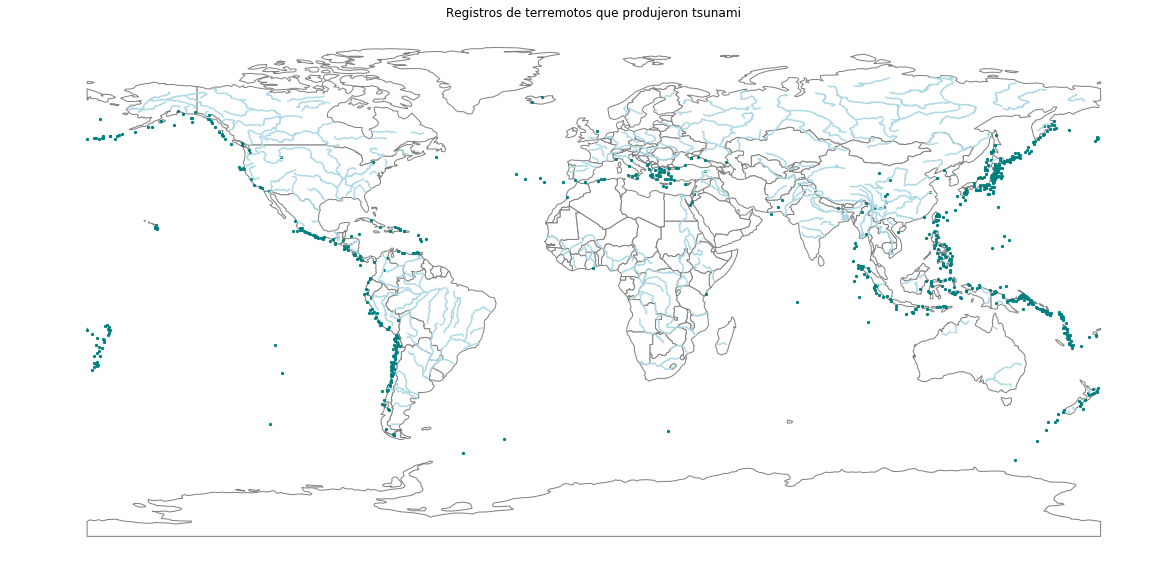

In [97]:
url = "https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_rivers_lake_centerlines_scale_rank.geojson"
riverslakes = gpd.read_file(url)
b6 = wd.plot(color='white', edgecolor='gray', figsize=(20, 20))
b7 = riverslakes.plot(color='lightblue', ax=b6)
eq100[eq100.FLAG_TSUNAMI=='Tsu'].plot(column='I_D', ax=b7, marker='o', color='teal', markersize=5)
plt.title('Registros de terremotos que produjeron tsunami')
b6.set_axis_off();

En la figura anterior se puede observar que la mayoria de los terremotos que han ocacionado tsunamis tuvieron su epicentro en el área marina, sin embargo, algunos de los que tuvieron lugar en la masa continental también ocacionarón repercusiones en la formación de tsunamis. En esta misma figura se plotearon los rios con amplitud de lago, con el fin de poder observar si algunos de los terremotos continentales que produjeron tsunamis se encontraban cercanos a estos cuerpos de agua, lo cual evidentemente se aprecia en la representación espacial de la figura anterior, con lo cual se podria intuir que estos eventos sismicos a su vez produjeron inundaciones en sitios o ciudades cercanas al epicentro. 

In [52]:
Mag_Tsu = eq100.groupby('EQ_PRIMARY')['FLAG_TSUNAMI'].value_counts()
Mag_Tsu.sort_values(ascending=False).head(10)

EQ_PRIMARY  FLAG_TSUNAMI
7.00        Tsu             56
7.30        Tsu             50
7.50        Tsu             47
6.90        Tsu             44
7.60        Tsu             43
7.20        Tsu             40
7.70        Tsu             40
7.80        Tsu             38
7.10        Tsu             37
6.50        Tsu             36
Name: FLAG_TSUNAMI, dtype: int64

Por otra parte, al comparar la cantidad de tsumanis ocurridos en relación con la magnitud de los terremotos que los ocacionarón, se destaca en la lista anterior que la mayoria están entre los 7.0 a 7.80, con algunos evento de magnitud 6

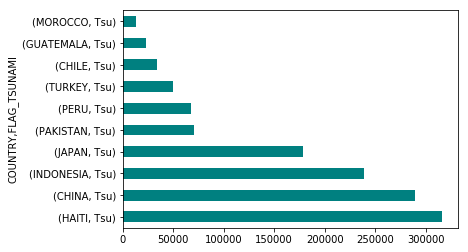

In [53]:
PaisD_T = eq100.groupby(['COUNTRY','FLAG_TSUNAMI'])['TOTAL_DEATHS'].sum()
PaisD_T.sort_values(ascending=False).head(10).plot.barh(color='teal')

Por último, de la comparación de la cantidad de muertos por terremotos que están relacionados con tsumanis se observa que casos como el de Haiti, China, Indonesia, Japon, destacan por sus cifras entre los más de 150 000 hasta los más de 300 000 muertos, aunque de estas cifras no se detalle en el dataframe cuanta fue la cantidad exacta de muertos por el tsunami. 

<h1>Efectos de los terremotos</h1>
<p>En esta sección se analizan aspectos tales como: el número de muertos por terremotos, número de lesiones, daños en millones de dólares y número de casas destruidas o dañadas. 
<p>Se ha registrado que el origen más común de muertes y lesiones en la mayoría de los terremotos está en traumas causados por el colapso parcial o total de las estructuras, debido, principalmente, al derrumbe de edificaciones no sismorresistentes, construidas con materiales inadecuados o pobremente erigidas. <p align = "right"><b><i>(Salazar-Arbelaez, Gabriel. (2018). Terremotos y salud: lecciones y recomendaciones. Salud Pública de México, 60(Supl. 1), 6-15. https://dx.doi.org/10.21149/9445)</i></b>

<h2>Muertes causadas por terremotos</h2>
<p>Con relación a la cantidad de muertes producidas por terremotos en los últimos 100 años, se puede distinguir que de un total de 1,095 terremotos con registro de muertes, el promedio de muertes es de 2,035, que la máxima cantidad de muertes correspondientes terremotos es de 316,000 fallecidos y que la mínima cantidad de muertes por terremotos es de 1 fallecido, entre otros datos que se pueden extraer del siguiente análisis

In [54]:
eq100_d = eq100.TOTAL_DEATHS.describe()
eq100_d

count     1,095.00
mean      2,035.10
std      16,918.65
min           1.00
25%           2.00
50%           8.00
75%          60.50
max     316,000.00
Name: TOTAL_DEATHS, dtype: float64

De los datos relacionados con muertes por terremotos, podría interesar conocer la cantidad de estos que corresponden a aquellos considerados como con eventos con pocos muertos, con algunos muertos, con muchos muertos y aquellos con gran cantidad de muertos, para lo cual se construye la siguiente función con la que se determinan rangos y categorías en relación al número de muertes (rangos establecidos a partir de la descripción de los metadatos de la base de datos) y se gráfican los resultados con base en el número de terremotos que se encuentran en tales categorias.

Terremotos con pocos muertos (1-50)                      2925
Terremotos con muchos muertos (100-1000)                  132
Terremotos con gran cantidad de muertos (más de 1000)      95
Terremotos con algunos muertos (50-100)                    71
Name: TOTAL_DEATHS, dtype: int64


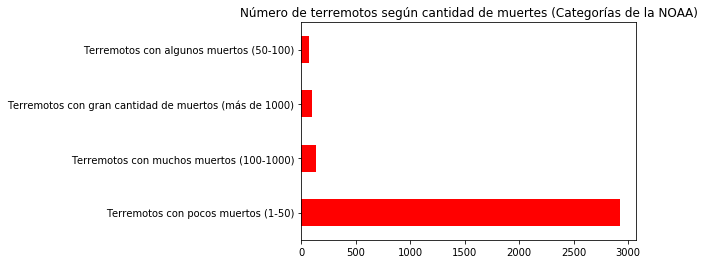

In [55]:
cm= eq100['TOTAL_DEATHS']

def QDeaths (cm):
    if cm >= 50 and cm <= 100:
        return "Terremotos con algunos muertos (50-100)"
    elif cm > 100 and cm <= 1000:
        return "Terremotos con muchos muertos (100-1000)"
    elif  cm > 1000:
        return "Terremotos con gran cantidad de muertos (más de 1000)"
    else:
        return "Terremotos con pocos muertos (1-50)"

n_muertes = eq100['TOTAL_DEATHS'].apply(QDeaths).value_counts()
print(n_muertes)
n_muertes.plot.barh(title='Número de terremotos según cantidad de muertes (Categorías de la NOAA)', color='red')

De la función anterior, resultados que se imprimen en un resumen y en su correspondiente gráfica, se destacan que: la mayoría de los terremotos se encuentran dentro de la categoría de aquellos eventos con poca cantidad de muertes, siendo esta alrededor de casi los 3000 y aquellos terremotos con gran cantidad de muertos corresponde a 95 fallecidos por esta causa.

Text(0.5, 1.0, 'Paises con mayor número de muertos por terremotos en los ultimos 100 años')

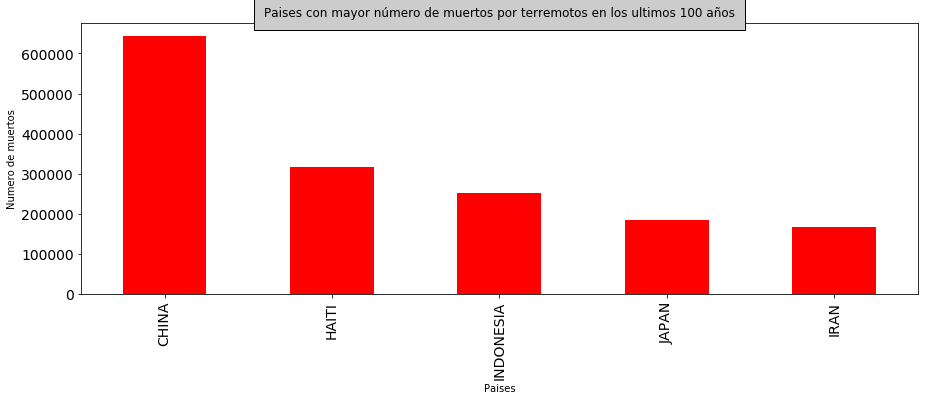

In [56]:
eq100.groupby('COUNTRY')['TOTAL_DEATHS'].sum().sort_values(ascending=False).head().plot(figsize=(15, 5),kind='bar', fontsize=14, color='red')
plt.xlabel('Paises')
plt.ylabel('Numero de muertos')
plt.title('Paises con mayor número de muertos por terremotos en los ultimos 100 años', bbox={'facecolor':'0.8', 'pad':10})

Al analizar la cantidad de muertes por país y al gráficar los resultados se tiene que: China es el país con la mayor cantidad registrada, siendo esta de más de 600 mil muertes, seguido por Haiti con entre 300 mil a 400 mil, de entre otros paises más que encabezan la lista, dentro de los cuales destacan: Indonesia, Japón, Irán.
<p>A continuación, la gráficación de dicha información en formato de representación espacial.

(-198.0, 198.0, -98.6822565, 92.3273865)

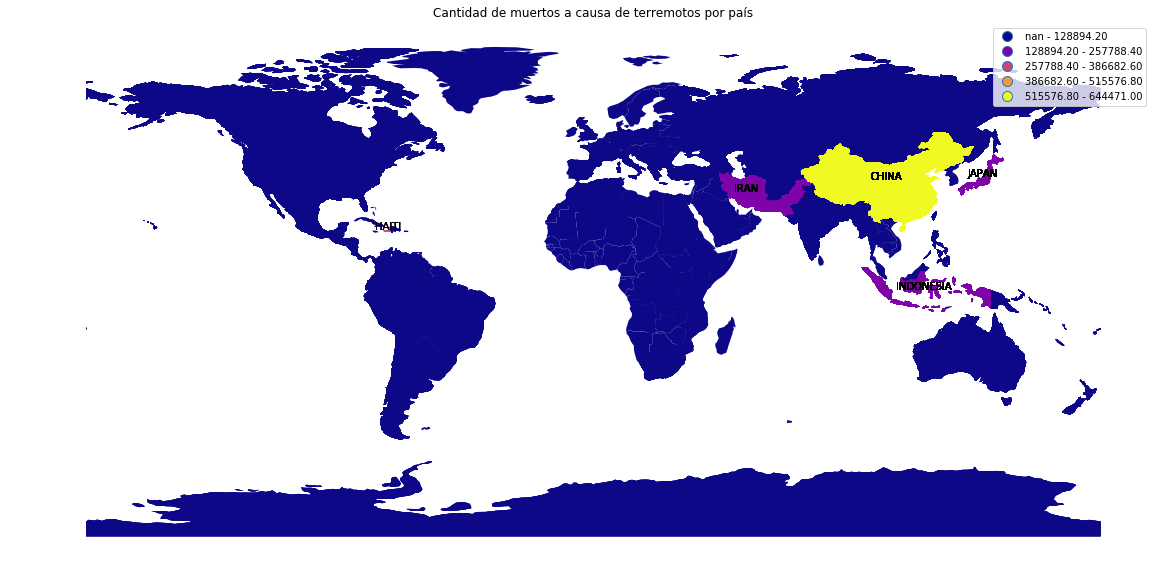

In [57]:
fig, ax = plt.subplots(1, figsize=(20, 20))

eq100_wd.plot(column='TDEATHS',legend=True, cmap='plasma', scheme='Equal_Interval', ax=ax)
plt.title('Cantidad de muertos a causa de terremotos por país')

for point in eq100_wd.loc[['CHINA','HAITI','INDONESIA', 'JAPAN', 'IRAN'],:].iterrows():
    ax.text(point[1]['centroid'].x,
            point[1]['centroid'].y,
            point[0],
            horizontalalignment='center',
            fontsize=10)
ax.axis('off')

En lo que respecta al número de muertos por terremotos según años, se tiene que a lo largo de la linea temporal analizada, han habido epocas en las que la cantidad de muertes ha sido mayor en comparación con otras en las que la cantidad a sido mínima, un hecho que se puede apreciar en la siguiente gráfica

Text(0.5, 1.0, 'Años en que se registro mayor número de muertos por terremotos en los ultimos 100 años')

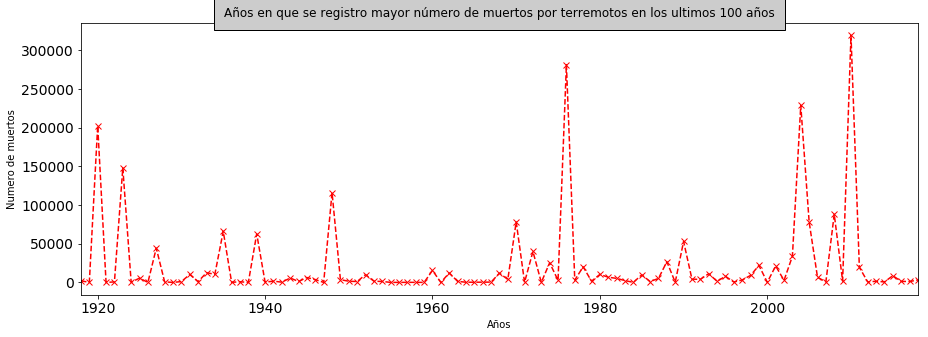

In [58]:
eq100.groupby('YEAR')['TOTAL_DEATHS'].sum().sort_index().plot(figsize=(15, 5), fontsize=14, style='r--x')
plt.xlabel('Años')
plt.ylabel('Numero de muertos')
plt.title('Años en que se registro mayor número de muertos por terremotos en los ultimos 100 años', bbox={'facecolor':'0.8', 'pad':10})

En la gráfica lineal temporal se aprecia que entre los años 20, 30 y 40, la cantidad de muertes por terremotos ha sido considerable, al igual que en la decada de los años 70, así como en la primera decada del 2000, destacando esta última por ser la que registra la mayor cantidad de muertos, seguido en significancia por uno en los años de la decada de los 70. Otras epocas, como el periodo que abarca desde la decada del 50 y 60, así como la correspondiente entre los años ochentas y noventas, es evidente una cantidad de muertes menor.

## Lesiones

Desde el punto de vista epidemiológico, la morbilidad y la mortalidad están relacionadas con lesiones traumáticas, las cuales demandan, muchas veces, niveles de atención médica especializada en un periodo corto, para lo cual en muchas ocasiones los Estado no se encuentran preparados. Las personas que sufren lesiones menores o fracturas no complejas, no requieren asistencia quirúrgica ni hospitalización, ya que son pacientes que pueden ser atendidos de manera ambulatoria. Por su parte, las lesiones severas que requieren hospitalización incluyen fracturas de cráneo con hemorragia, lesiones cervicales con compromiso neurológico y daño a los órganos intratorácicos, intraabdominales e intrapélvicos tales como neumotórax, laceraciones del hígado o ruptura esplénica. Este tipo de lesiones pueden tener un desenlace mortal dependiendo de su complejidad o si no se tratan a tiempo.<p align = "right"><b><i>(Salazar-Arbelaez, Gabriel. (2018). Terremotos y salud: lecciones y recomendaciones. Salud Pública de México, 60(Supl. 1), 6-15. https://dx.doi.org/10.21149/9445)</i></b>

Para analizar, a nivel general, el número de terremotos ocurridos en relación a la cantidad de personas lesionadas por estos, a continuación se crea una función con la que se determinan rangos y categorías en relación al número de lesiones (rangos establecidos a partir de la descripción de los metadatos de la base de datos) y se gráfican los resultados con base en el número de terremotos que se encuentran en tales categorias.

Terremotos con pocos lesiones (1-50)                      2709
Terremotos con muchos lesiones (100-1000)                  259
Terremotos con algunos lesiones (50-100)                   134
Terremotos con gran cantidad de lesiones (más de 1000)     121
Name: TOTAL_INJURIES, dtype: int64


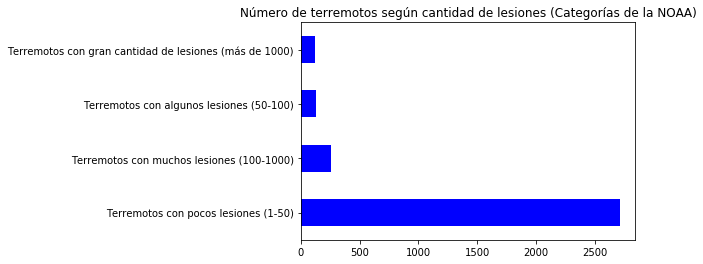

In [59]:
cd= eq100['TOTAL_INJURIES']

def QDamn (cd):
    if cd >= 50 and cd <= 100:
        return "Terremotos con algunos lesiones (50-100)"
    elif cd > 100 and cd <= 1000:
        return "Terremotos con muchos lesiones (100-1000)"
    elif  cd > 1000:
        return "Terremotos con gran cantidad de lesiones (más de 1000)"
    else:
        return "Terremotos con pocos lesiones (1-50)"

n_damn = eq100['TOTAL_INJURIES'].apply(QDamn).value_counts()
print(n_damn)
n_damn.plot.barh(title='Número de terremotos según cantidad de lesiones (Categorías de la NOAA)', color='blue')

El anterior gráfico nos muestra que la mayoría de los terremotos produjeron pocas lesiones, 2709 terremotos que produjeron entre 0 a 50 lesiones, siendo los terremotos con gran número de lesiones los de menor cantidad, en total 121 eventos con más de 1000 lesionados. Por su parte, el número de terremotos con muchas lesiones se pueden considerar como un dato significativo en relación a los últimos 100 años analizados, el cual corresponde a 259 terremotos con un rango de lesionados entre los 100 a 1000 personas.

Desde el punto de vista de la cantidad de lesiones por terremtos a lo largo de los últimos 100 años se tiene que

YEAR
1976    891,548.00
2008    378,870.00
2010    325,568.00
2001    179,464.00
2005    157,648.00
1990    120,556.00
1999     73,335.00
1970     52,493.00
2003     49,050.00
1923     47,000.00
Name: TOTAL_INJURIES, dtype: object


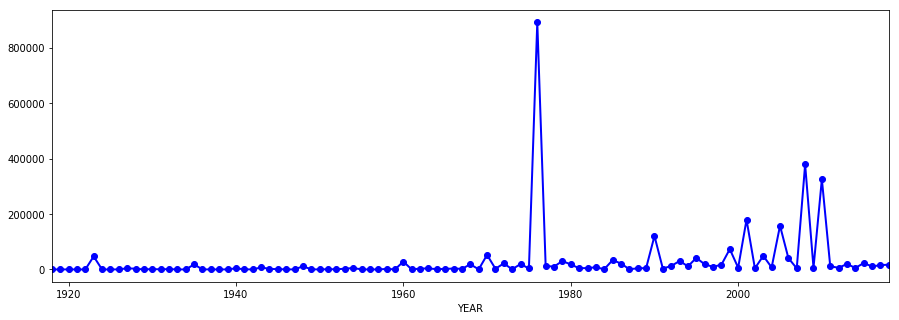

In [60]:
damn_y = eq100.groupby(['YEAR'])['TOTAL_INJURIES'].sum()
print(damn_y.sort_values(ascending=False).head(10).map('{:,.2f}'.format))
damn_y.plot.line(style='bo-', linewidth=2, figsize=(15, 5), x_compat=True)

Los años con mayor número de lesiones corresponde a 1976 en el que hubieron más de 890 mil lesiones por terremotos, siendo este representado en la gráfica anterior como el pico más alto en la linea de tiempo. A este año le siguen otros que fueron significativos en cuanto a números mayores a 100 mil, entre los que están el 2008, 2010, 2001, 2005 y 1990 respectivamente. De estos últimos años mencionados se detaca el hecho de que al menos 4 pertencen a la primera década del siglo XXI.

Al analizar la cantidad total de lesiones a razón de paises se tiene que

In [61]:
damn_c = eq100.groupby(['COUNTRY'])['TOTAL_INJURIES'].sum()
damn_c.sort_values(ascending=False).head(10).map('{:,.2f}'.format)

COUNTRY
CHINA        1,273,126.00
HAITI          300,580.00
INDIA          201,222.00
IRAN           193,976.00
PAKISTAN       167,870.00
JAPAN          131,766.00
INDONESIA       83,895.00
GUATEMALA       76,583.00
TURKEY          76,229.00
PERU            73,556.00
Name: TOTAL_INJURIES, dtype: object

China supera significativamente al resto al registrar más de 1 millón 270 mil lesiones por terremotos. A China le sigue Haiti con más de 300 mil lesionados, al igual que India con más de 200 mil, destacando también otros paises como: Irán, Pakistán, Japón entre otros. En la lista anterior de paises que sobresalen en este análisis se distigue la presencia de muchos que se encuentran ubicados en Asia. También podemos ver una relación entre los datos sobre el número de lesiones y número de muertos por país.

## Pérdidas económicas

Como es bien sabido, uno de los efectos directos e indirectos de los terremotos son los daños materiales, los cuales pueden ser traducidos en términos económicos como pérdidas. Dentro de la base de datos analizada, estas pérdidas económicas son cuantificadas en millones de dólares. Es importante recalcar que el valor en la columna Daños debe ser multiplicado por 1,000,000 para obtener la cantidad real en dólares, además de que el valor en dólares listado es el valor al momento del evento y no se utiliza ningun convertidor para calcular los valores actuales del dólar, como la Calculadora de Precios de Consumo. Según la metadata del dataframe, se utilizaron tablas de conversión monetaria para la época del evento con el fin de convertir moneda extranjera a dólares de EE.UU. (https://data.nodc.noaa.gov/cgi-bin/iso?id=gov.noaa.ngdc.mgg.hazards:G012153;view=iso#idp96096)

Al analizar las perdidas en millones de dolares tenemos que

In [62]:
eq100.TOTAL_DAMAGE_MILLIONS_DOLLARS.agg(['max', 'min', 'mean']).map('${:,.0f} millones'.format)

max     $220,085 millones
min           $0 millones
mean      $1,994 millones
Name: TOTAL_DAMAGE_MILLIONS_DOLLARS, dtype: object

En total se registra un máximo mayor a los 220 mil millones de dólares en perdidas, siendo el mínimo registrado en 0 millones dólares y el promedio en más de 1 993 millones de dólares.

Al realizar el análisis de perdidas materiales a causa de terremotos en millones de dolares se tienen los siguientes datos

COUNTRY  LOCATION_NAME                                       YEAR
JAPAN    JAPAN:  HONSHU                                      2011    $220,085.46 millones
         JAPAN:  SW HONSHU:  KOBE, AWAJI-SHIMA, NISHINOMIYA  1995    $100,000.00 millones
CHINA    CHINA:  SICHUAN PROVINCE                            2008     $86,000.00 millones
USA      CALIFORNIA:  NORTHRIDGE                             1994     $40,000.00 millones
CHILE    CHILE:  MAULE, CONCEPCION, TALCAHUANO               2010     $30,000.00 millones
JAPAN    JAPAN:  HONSHU:  NIIGATA PREFECTURE                 2004     $28,000.00 millones
         JAPAN:  KUMAMOTO, OITA                              2016     $20,000.00 millones
ITALY    ITALY:   AVELLINO, POTENZA, CASERTA, NAPLES         1980     $20,000.00 millones
TURKEY   TURKEY:  ISTANBUL, KOCAELI, SAKARYA                 1999     $20,000.00 millones
ARMENIA  ARMENIA:  LENINAKAN, SPITAK, KIROVAKAN              1988     $16,200.00 millones
Name: TOTAL_DAMAGE_MILLIONS_DOLLAR

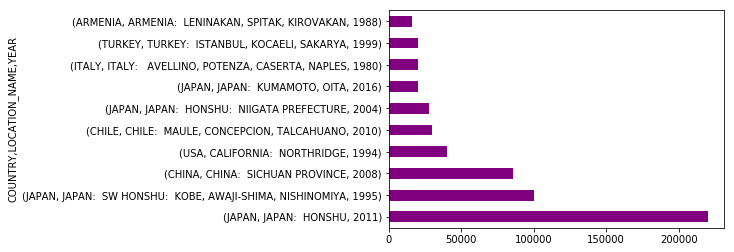

In [63]:
eq100_pm = eq100.groupby(['COUNTRY', 'LOCATION_NAME','YEAR'])['TOTAL_DAMAGE_MILLIONS_DOLLARS'].sum()
print(eq100_pm.sort_values(ascending=False).head(10).map('${:,.2f} millones'.format))
eq100_pm.sort_values(ascending=False).head(10).plot.barh(color='purple')

En esta lista de los 10 paises con más cantidad de millones de dolares en daños, Japón repite en 4 ocaciones. Este pais es el que más millones en daños ha registrado, ocurriendo esto en dos ocaciones, en 2011 con el terremoto de Honshu y en 1995 con el terremoto de Kobe, Awaji-Shima, Nishinomiya. A este pais le sigue China con el terremoto de la provincia de Shichan en 2008. En tercer lugar esta el terremoto de Northridge California, USA en 1994; Chile en 2010, entre otros. 

(-198.0, 198.0, -98.6822565, 92.3273865)

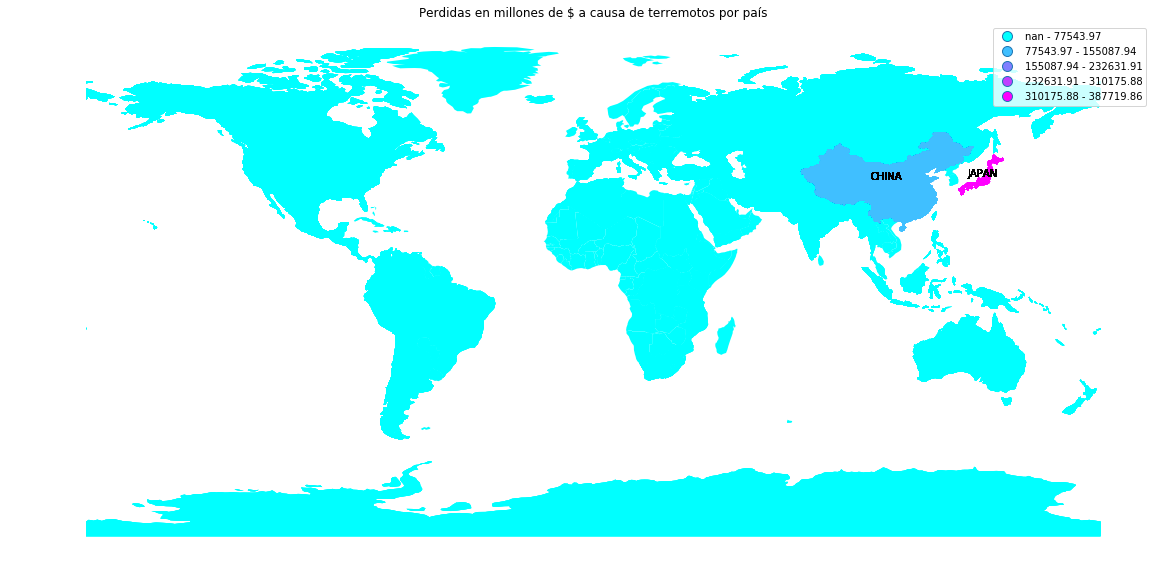

In [64]:
fig, ax = plt.subplots(1, figsize=(20, 20))

eq100_wd.plot(column='TDAMAGED',legend=True, cmap='cool', scheme='Equal_Interval', ax=ax)
plt.title('Perdidas en millones de $ a causa de terremotos por país')

for point in eq100_wd.loc[['JAPAN','CHINA'],:].iterrows():
    ax.text(point[1]['centroid'].x,
            point[1]['centroid'].y,
            point[0],
            horizontalalignment='center',
            fontsize=10)
ax.axis('off')

Al trasladar los datos anteriores a una representación espacial se tiene que efectivamente los que sobresalen del resto de paises con mayores perdidas millonarias a causa de los terremotos son Japón y China.

## Casas destruidas o dañadas
Siguiendo en la linea de perdidas materiales, el tema de casas destruidas o dañadas sale a relucir para un análisis.

Respecto al número de casas destruidas por los terremotos en los últimos 100 años en relación a los lugares donde se registraron los eventos se obtienen los siguientes resultados

In [65]:
eq100_hd = eq100.groupby(['LOCATION_NAME','YEAR'])['TOTAL_HOUSES_DESTROYED'].sum().sort_values(ascending=False).head(10)
eq100_hd.map('{:,.0f}'.format)

LOCATION_NAME                                         YEAR
CHINA:  SICHUAN PROVINCE                              2008    6,173,740
CHINA:  YUNNAN PROVINCE:  LIJIANG                     1996      959,000
JAPAN:  TOKYO, YOKOHAMA                               1923      695,000
CHINA:  YUNNAN PROVINCE                               1988      412,000
INDIA:  GUJARAT:  BHUJ, AHMADABAD, RAJOKOT; PAKISTAN  2001      339,000
NEPAL:   KATHMANDU; INDIA; CHINA; BANGLADESH          2015      299,588
CHINA:  YUNNAN PROVINCE                               2003      264,878
ALGERIA:  NORTHERN                                    1980      250,000
JAPAN:  SW HONSHU:  KOBE, AWAJI-SHIMA, NISHINOMIYA    1995      200,000
CHINA:  JIANGXI:  JIUJIANG, RUICHANG                  2005      150,000
Name: TOTAL_HOUSES_DESTROYED, dtype: object

La provincia Sichuan de China obtiene el mayor número de casas destruidas a causa del evento registrado en el 2008, siendo este de más de 6 millones, le sigue el terremoto de la localidad de Lijiang en la provincia de Yunnan de igualmente China con 959 mil casas destruidas en 1996. La anterior provincia repite 2 veces más en los sitios que encabezan la lista del dato aquí analizado, sumando además otro sitio en China. Otros de los paises que encabezan esta lista estan: Japón, India, Nepal, Algeria.

En la siguiente lista se detalla a nivel pais cuales destacan como los que registran más cantidad de casas destruidas por terremotos en los últimos 100 años, algunos de los cuales ya aparecen en la lista anterior y a esta se suman otros paises

In [66]:
eq100_hd = eq100.groupby('COUNTRY')['TOTAL_HOUSES_DESTROYED'].sum().sort_values(ascending=False).head(10)
eq100_hd.map('{:,.0f}'.format)

COUNTRY
CHINA          9,265,672
JAPAN          1,266,199
INDONESIA        386,189
INDIA            377,324
ALGERIA          319,331
NEPAL            304,790
TURKEY           231,349
EL SALVADOR      149,628
GREECE           120,338
IRAN             105,997
Name: TOTAL_HOUSES_DESTROYED, dtype: object

Si hacemos un análisis del número de casas destruidas a causa de los terremotos en la linea de tiempo de los útimos 100 años y  gráficamos los 10 años que registran más destrucción se obtiene el siguiente resultado

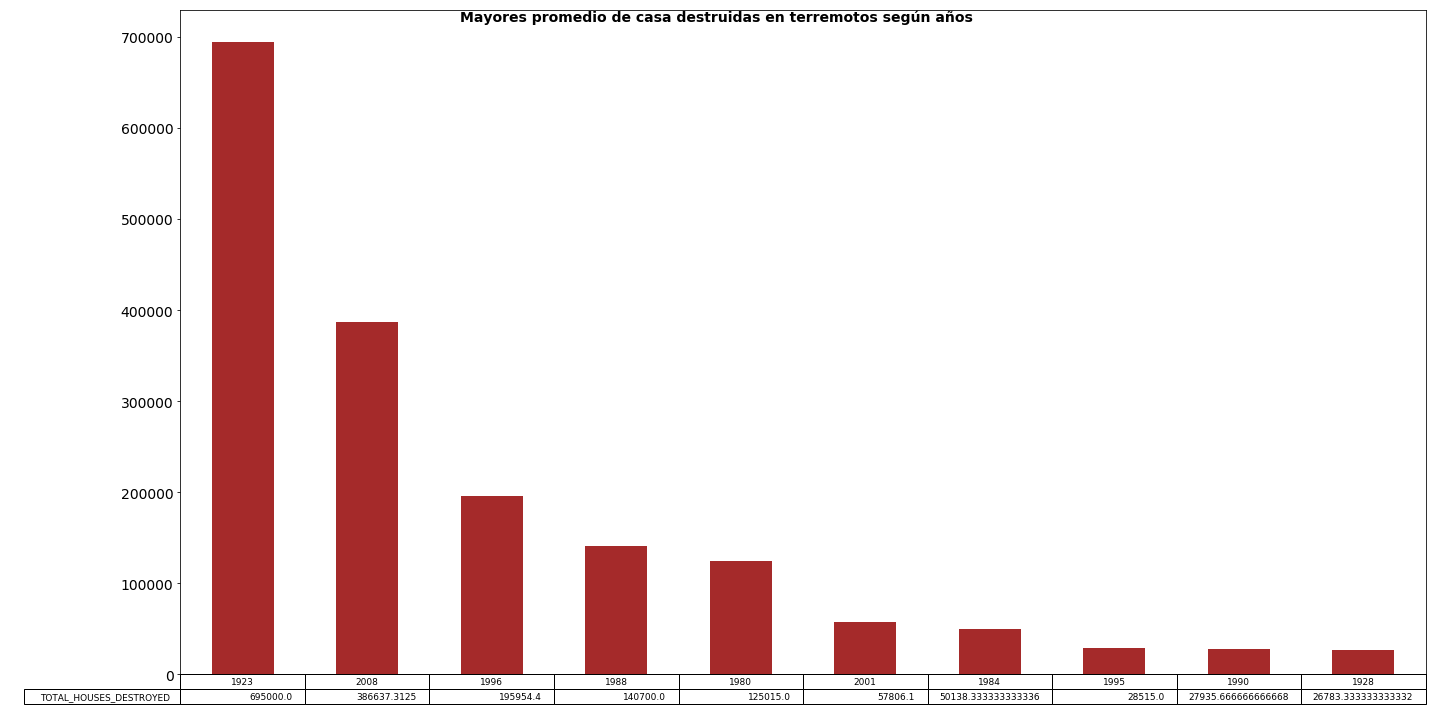

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10), tight_layout=True)
fig.suptitle('Mayores promedio de casa destruidas en terremotos según años', fontsize=14, fontweight='bold')
#fig.dpi = 600
ax.get_xaxis().set_visible(False)
eq100_hd = eq100.groupby('YEAR')['TOTAL_HOUSES_DESTROYED'].mean().sort_values(ascending=False).head(10)
eq100_hd.plot.bar(color='brown', table=True, ax=ax, fontsize=14)
#plt.savefig('total_houses_destroyed_erthq.png')

El año 1923 es el que registra una mayor cantidad de casas destruidas, logrando casi alcazar las 700 mil casas, y por poco doblando en número a la siguiente posición la cual corresponde al año 2008, con alrededor de 4000 mil, el cual a su vez casi dobla en número al siguiente año que corresponde a 1996, que registra alrededor de las 200 mil casas destruidas. Entre los años que presentan entre las 100 mil y 200 mil casas destruidas estan: 1988 y 1980. El resto de años que aparecen en la gráfica no sobrepasan las 100 casas destruidas.

Como uno de los aspectos que pueden resultar interesantes de analizar con relación al tema de casa destruidas por terremotos, a continuación se compara gráficamente este dato con los temas de magnitudes e intesidades, con el fin de ver la posible relación que exista entre estos.

Text(0, 0.5, 'Cantidad de casas destruidas')

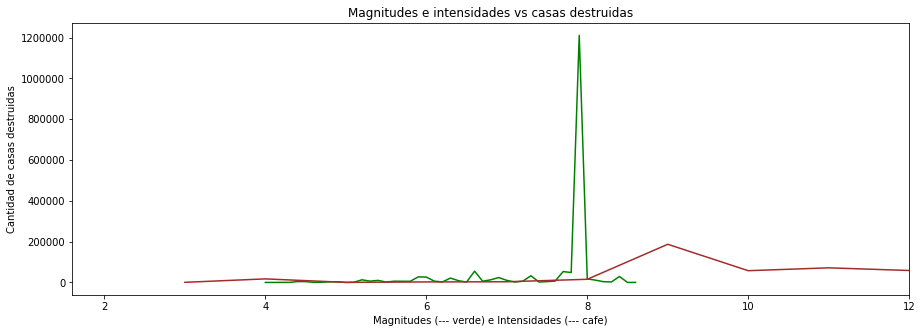

In [68]:
eq100.groupby('EQ_PRIMARY')['TOTAL_HOUSES_DESTROYED'].mean().plot(color='green', figsize=(15, 5))
eq100.groupby('INTENSITY')['TOTAL_HOUSES_DESTROYED'].mean().plot(color='brown', figsize=(15, 5))
plt.title("Magnitudes e intensidades vs casas destruidas")
plt.xlabel('Magnitudes (--- verde) e Intensidades (--- cafe)')
plt.ylabel('Cantidad de casas destruidas')

En la gráfica se observa en el eje "Y" la cantidad de casas destruidas y en el eje "X" las magnitudes (linea color verde) e intensidades (linea color café) registradas en los terremotos de los últimos 100 años. De la información visible en la gráfica se observa que el pico más alto en cuanto a cantidad de casa destruidas se registra en las magnitudes cercanas a los 8 grados, siendo una cantidad mayor a las 1 millón 200 mil casas. Por su parte, la mayor cantidad de casas destruidas en relación con la intensidad del terremoto se localiza en los 9 grados, siendo este último dato no tan representativo en la gráfica comparandolo con el de las magnitudes, aunque a diferencia de este último, posterior a los 8 grados, la curva de intensidades si aumenta en relación al eje de la cantidad de casas destruidas.

En lo que respecta al mayor número de casas dañadas por pais y por años a causa de terremotos se tiene que

In [69]:
eq100_hdm = eq100.groupby('COUNTRY')['TOTAL_HOUSES_DAMAGED'].sum().sort_values(ascending=False).head(10)
print(eq100_hdm.map('{:,.0f}'.format))
eq100_hdmy = eq100.groupby('YEAR')['TOTAL_HOUSES_DAMAGED'].sum().sort_values(ascending=False).head(10)
print(eq100_hdmy.map('{:,.0f}'.format))

COUNTRY
CHINA          21,864,664
CHILE             528,921
INDONESIA         470,137
JAPAN             372,778
NEPAL             269,107
HAITI             199,880
EL SALVADOR       185,919
INDIA             159,023
TURKEY            101,652
MEXICO             94,106
Name: TOTAL_HOUSES_DAMAGED, dtype: object
YEAR
2008    21,026,554
2010       698,557
2015       395,498
2011       341,680
2009       287,076
2014       251,700
2018       230,007
2013       208,217
2001       189,274
2017       181,761
Name: TOTAL_HOUSES_DAMAGED, dtype: object


Nuevamente la lista la encabeza China con más de 21 millones de casas dañadas, lo cual resulta un dato que sobresale del resto de pais, dado el hecho de que la diferencia en cantidad es avismal comparado con los siguientes paises en la lista. Por ejemplo, despues de China le sigue Chile con más de 528 mil casas dañadas y posterior a este pais, el resto representan menos de 500 mil casas dañadas. En la lista de paises le sigue a Chile, Indonesia, Japón, Nepal, entre otros.
En cuanto al mayor número de casas dañadas según año se tiene que el 2008 fue el que registro una mayor cantidad de estos, con alrededor de 21 millones de casas dañadas, y al igual que el caso explicado anteriormente respecto al caso de China, la diferencia con la cantidad registrada por el resto de años es avismal. De modo tal que, los siguientes años no sobrepasan los 700 mil casas dañadas. Un dato importante de señalar es que en este filtro de las 10 primeras posiciones que suman el mayor número de casas dañadas por año presentan a la cabeza años corresponden únicamente a aquellos posteriores al siglo XXI.

En cuanto a la cantidad de casas dañados por terremotos nos interesaria realizar la misma comparativa en cuanto a magnitudes e intensidades, representado en la siguiente gráfica

Text(0, 0.5, 'Cantidad de casas damnificadas')

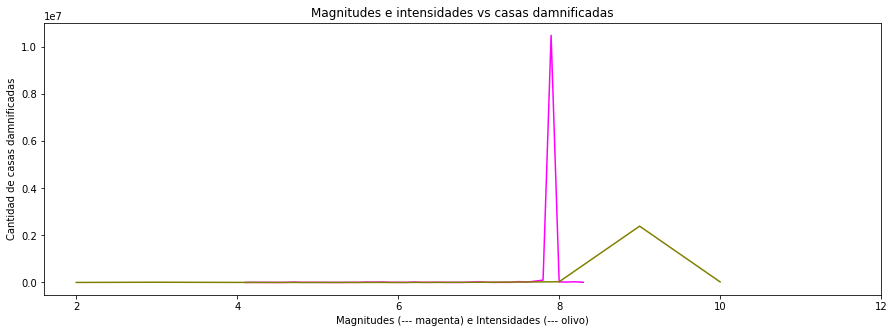

In [70]:
eq100.groupby('EQ_PRIMARY')['TOTAL_HOUSES_DAMAGED'].mean().plot(color='magenta', figsize=(15, 5))
eq100.groupby('INTENSITY')['TOTAL_HOUSES_DAMAGED'].mean().plot(color='olive', figsize=(15, 5))
plt.title("Magnitudes e intensidades vs casas damnificadas")
plt.xlabel('Magnitudes (--- magenta) e Intensidades (--- olivo)')
plt.ylabel('Cantidad de casas damnificadas')

En la gráfica en la que se compara número de casas dañadas (eje y) en relación con las magnitudes (linea magenta) y las intensidades (linea verde olivo) correspondientes al eje x, se aprecia que nuevamente el pico más de las magnitudes en relación a la cantidad de casas dañadas se ubica cercano a los 8 grados, y de igual forma la mayor cantidad de casas dañadas por terremotos en relación con la intensidad se ubica en los 9 grados.

## Frecuencia interanual con la que ocurren de los terremotos por país

Uno de los temas que preocupan a muchas de las personas que habitan un país que ya ha sido asotado por algún terremoto es la incognita de saber cuando podría ocurrir nuevamente un evento de este tipo. Dado el hecho de que la predicción de terremotos no es posible de lograr, por su parte, si es posible al menos conocer con que frecuencia estos han estado ocurriendo en un lugar determinado. Bajo esta premisa y, aprovechando la información que nos brinda el dataframe aquí analizado, se ha propuesto, en esta última sección, analizar la frecuencia interanual con la que suceden los terremotos por país, esto sin tratar de caer en la presunción de afirmar que efectivamente la frecuencia resultante es un dato fidedigno de lo que ocurre en la realidad y que, aunque si así pudiera ser, es importante recalcar que un terremoto varia en significancia respecto a diversas variantes, siendo una de ellas la magnitud, por lo que dada una frecuencia se estaría en desconocimiento de las magnitudes que estas pudierán presentar.

Como primer paso para continuar con el análisis propuesto, se crea a continuación un nuevo dataframe, basado en el ya aquí trabajado, para que este únicamente contenga la información que se requerirá.

In [71]:
cym= eq100.loc[:,['COUNTRY','YEAR','EQ_PRIMARY']].sort_values(by=['COUNTRY','YEAR']).reset_index(drop=True)
pd.DataFrame(cym)

,COUNTRY,YEAR,EQ_PRIMARY
0,AFGHANISTAN,1921,7.80
1,AFGHANISTAN,1922,7.50
2,AFGHANISTAN,1929,7.10
3,AFGHANISTAN,1937,7.20
4,AFGHANISTAN,1939,6.90
5,AFGHANISTAN,1949,7.50
6,AFGHANISTAN,1954,nan
7,AFGHANISTAN,1956,7.60
8,AFGHANISTAN,1965,7.30
9,AFGHANISTAN,1972,6.10


Dicho dataframe contine los nombres de los paises así como el año en que ocurrío el terremoto y su magnitud respectiva. Además, este dataframe se ordena con base al nombre del país y al año, para posteriormente realizar un análisis de la diferencia númerica que existe entre un año y el anterior dado un país, esto con el fín de poseer en una nueva columna con dicho valor interanual y a su vez, calcular el promedio de dicho valor para cada país, dato que se aloja en una nueva columna.

In [72]:
cym["DIFFYEAR"] = cym['YEAR'].diff().fillna(0).astype(int)
cym.DIFFYEAR[cym.DIFFYEAR < 0] = 0
cym['DIFFYEAR_AV'] = cym.COUNTRY.map(cym.groupby('COUNTRY')['DIFFYEAR'].mean()).astype(int)
cym

,COUNTRY,YEAR,EQ_PRIMARY,DIFFYEAR,DIFFYEAR_AV
0,AFGHANISTAN,1921,7.80,0,2
1,AFGHANISTAN,1922,7.50,1,2
2,AFGHANISTAN,1929,7.10,7,2
3,AFGHANISTAN,1937,7.20,8,2
4,AFGHANISTAN,1939,6.90,2,2
5,AFGHANISTAN,1949,7.50,10,2
6,AFGHANISTAN,1954,nan,5,2
7,AFGHANISTAN,1956,7.60,2,2
8,AFGHANISTAN,1965,7.30,9,2
9,AFGHANISTAN,1972,6.10,7,2


Una vez se conozca el promedio internual, se procede a crear una función que permita agrupar los valores conseguidos con la finalidad de disponer de categorías por frecuencia en la ocurrencia de terremotos, desde Muy Alta hasta Muy Baja. A partir de los resultados se crea una nueva columna en el dataframe.

In [73]:
pdy = cym.DIFFYEAR_AV

def QEq_y (pdy):
    if pdy >= 1 and pdy <= 5:
        return "Frecuencia Muy Alta en ocurrencia de terremotos: entre 1 y 5 años"
    elif pdy > 5 and pdy <= 10:
        return "Frecuencia Alta en ocurrencia de terremotos: entre 6 y 10 años"
    elif pdy > 10 and pdy <= 20:
        return "Frecuencia Media en ocurrencia de terremotos: entre 11 y 20 años"
    elif pdy > 20:
        return "Frecuencia Baja en ocurrencia de terremotos: entre 21 años a más"
    else:
        return "Frecuencia Muy Baja en ocurrencia de terremotos: 0 años"

cym['FREQ_EQ'] = cym['DIFFYEAR_AV'].apply(QEq_y)

Posteriormente se impreme los resultados, tratando de conocer aquellos paises que poseen una Frecuencia Muy Alta de ocurrencia de terremotos, paises donde el promedio de ocurrencia se enmarca entre 1 año a 5 años.

In [74]:
cym[cym.FREQ_EQ == 'Frecuencia Muy Alta en ocurrencia de terremotos: entre 1 y 5 años'].groupby(['FREQ_EQ', 'COUNTRY'])['DIFFYEAR_AV'].mean().sort_values()

FREQ_EQ                                                            COUNTRY                       
Frecuencia Muy Alta en ocurrencia de terremotos: entre 1 y 5 años  INDIA                             1
                                                                   MEXICO                            1
                                                                   SAUDI ARABIA                      1
                                                                   MADAGASCAR                        1
                                                                   SOLOMON ISLANDS                   1
                                                                   PAPUA NEW GUINEA                  1
                                                                   GREECE                            1
                                                                   SUDAN                             1
                                                                   PHILIPPINES

En la lista de paises, se logran apreciar algunos que ya han destacado por algún hecho en los anteriores análisis, como es el caso de: India, Mexico, Islas Solomon, Papua Nueva Guinea, Pakistán, Estados Unidos, entre otros.
Como dato importante, en esta categoria aparece Costa Rica, como uno de los paises que presentan frecuencia de terremotos cada 3 años.

En la siguiente lista, se muestran los paises que presentan, según el promedio de diferencia interanual, la categoria de frecuencia Alta en ocurrencia de terremotos, la cual reune a aquellos lugares que presentan promedios entre 6 y 10 años. 

In [75]:
cym[cym.FREQ_EQ == 'Frecuencia Alta en ocurrencia de terremotos: entre 6 y 10 años'].groupby(['FREQ_EQ', 'COUNTRY'])['DIFFYEAR_AV'].mean().sort_values()

FREQ_EQ                                                         COUNTRY           
Frecuencia Alta en ocurrencia de terremotos: entre 6 y 10 años  ARGENTINA              6
                                                                AZORES (PORTUGAL)      6
                                                                TONGA                  6
                                                                ROMANIA                6
                                                                CANADA                 6
                                                                KYRGYZSTAN             6
                                                                KAZAKHSTAN             6
                                                                FIJI                   6
                                                                GERMANY                7
                                                                SAMOA                  7
                           

En esta lista vemos paises que, al igual que en la categoria anterior, destacarón en anteriores análisis por alguna particularidad. Dentro de estos están: Samoa, Uzbekistan, Nepal, Antarctica, entre otros.

## Conclusiones y recomendaciones

A través de los diferentes análisis llevados a cabo en función del estudio de los terremotos y sus consecuencias, se logró desarrollar, de forma eficiente, cada uno de los objetivos propuestos, esto gracias a las facilidades que brinda el lenguaje de Python así como cada uno de las librerias utilizadas.
<p>Con relación a los análisis logrados, ha sido posible identificar patrones de distribución y frecuencia por lugar de los eventos sismicos, así como, variantes y similitudes entre cantidades de terremotos, tsumanis, muertes, daños, etc, ya fuese por periodo temporal o por ubicación geográfica. Se identificarón lugares y paises que han sido mayormente afectados por los terremotos en los últimos 100 años, casos como el de China, Indonesia, Japón, entre otros. También fue posible identificar patrones de ocurrencia en magnitudes y en intensidades sismicas y las diversas relaciones que estas pudiesen tener con otras variables analizadas. Por último, se propuso un acercamiento al estudio de frecuencias temporal por ocurrencia de terremotos, un aspecto que brindo información bastante relevante.
<p>Desde el punto de vista técnico, fue posible probar diversos métodos de análisis así como herramientas y funciones que permitieron mostrar eficientemente la información requerida, ya fuese a la hora de visualizar la información en tablas, listas, series, gráficas o representaciones espaciales.
<p>Por último, es importante recalcar la relevancia de este tipo de bases de datos y su correspondiente análisis ya que mucha de la información que esta brinda puede ayudar a prepararnos mejor ante eventos sismicos que puedan ocurrir en un futuro, ya sea desde el punto de vista científico, mejorando los sistemas de registro de datos sobre terremotos o incluyendo nuevas variables para su valoración, o desde el punto de vista de la planificación, con el fín de tomar medidas para disminuir la vulnerabilidad ante este tipo de eventos, y poder así salvar vidas, así como disminuir posibles impactos en la infraestructura y en la economía.
<p>Dada la complejidad de la tématica, así como de la información de la base de datos empleada, que hicierón de este un documento extenso, sin embargo, muy a pesar de la variedad de aspectos que se analizarón existen otros más que pueden resultar de interés y que no fuerón posibles de abordar en este estudio, mismos que pueden considerarse para posteriores, como por ejemplo: el estudio de frecuencias de terremotos según meses, el tiempo de duración de los terremotos usando los datos de horas y segundos, el dato de costos monetarios en relación con el valor del dolar actual, los cambios que se han presentado en las magnitudes por país o cualquier otro cruce de variables que se haya vislumbrado como faltante a lo largo de la lectura de este documento.